# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+ PRESSURE TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [18]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


In [2]:
path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\DATASOURCE\\"
train_file_name = "TRAIN.csv"
test_file_name = "TEST.csv"
model_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\MODELS\\"
train = pd.read_csv(path+train_file_name)
test = pd.read_csv(path+test_file_name)

export_data_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\FIGURES\\"


In [3]:
X_train = train.drop("Density",axis = 1)
y_train = train.Density
X_test = test.drop("Density",axis = 1)
y_test = test.Density

                              #### Load Models For testing purpose  ####

In [4]:
#All File Name variable
scaler_file = 'scaler.sav'
linear_file = 'linear_model.sav'
svr_file    = 'svr_model.sav'
dt_file     = 'dt_model.sav'
rf_file     = 'rf_model.sav'
knn_file    = 'knn_model.sav'
xgb_file    = 'xgb_model.sav'

ann_file    = 'ann_model.h5'

In [5]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
linear_regression = pickle.load(open(model_path+linear_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
dt_regression     = pickle.load(open(model_path+dt_file , "rb"))
rf_regression     = pickle.load(open(model_path+rf_file , "rb"))
knn_regression    = pickle.load(open(model_path+knn_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))

ann_regression    = load_model(model_path+ann_file)

                              #### First Scale All Inputs with scaler model  ####

In [6]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. Linear Regression Model

                              #### Calculate VIF for features ####

In [7]:
VIF = [variance_inflation_factor(x_train , i) for i in range(0,x_train.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [8]:
VIF_DataFrame = pd.DataFrame(VIF)
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)
VIF_DataFrame["FEATURES"] = X_train.columns
VIF_DataFrame = VIF_DataFrame[["FEATURES" , "VIF"]]
VIF_DataFrame

FEATURES         VIF
0      H2S   71.367143
1       N2   29.795244
2      CO2   11.274044
3       C1  708.850791
4       C2   63.954005
5    C3-C6   88.763298
6      C7+  677.649821
7    MWC7+    5.929897
8     Temp    1.491827
9        P    1.753342

In [9]:
linear_regression.intercept_

567.0905344497041

In [10]:
linear_regression.coef_

array([ -34.12403913,   -8.87623381,  -10.35879042, -111.86237786,
        -19.10836489,   21.00042693,   81.73598424,  -28.47161463,
        -51.58031524,   59.31258514])

In [11]:
linear_weight = pd.DataFrame()
linear_weight["Feature"] = X_train.columns
linear_weight["Weights"] = linear_regression.coef_
linear_weight

Feature     Weights
0     H2S  -34.124039
1      N2   -8.876234
2     CO2  -10.358790
3      C1 -111.862378
4      C2  -19.108365
5   C3-C6   21.000427
6     C7+   81.735984
7   MWC7+  -28.471615
8    Temp  -51.580315
9       P   59.312585

In [12]:
linear_regression_test_Prediction = linear_regression.predict(x_test)
linear_regression_train_Prediction = linear_regression.predict(x_train)

In [13]:
linear_regression_trainR2 = linear_regression.score(x_train,y_train)
linear_regression_testR2 = linear_regression.score(x_test,y_test)
print(linear_regression_trainR2,linear_regression_testR2)

0.8782946380288553 0.7943448136042375


                     #### Model Result for train and test data for linear Regression ####

In [14]:
result_lr_train = pd.DataFrame()
result_lr_train["Density (train)"] = y_train
result_lr_train["Predicted Density (train)"] = linear_regression_train_Prediction
result_lr_train["Residues"] = abs(result_lr_train["Density (train)"] - result_lr_train["Predicted Density (train)"])
result_lr_train["Absolute Error (%)"] = result_lr_train["Residues"]*100/result_lr_train["Density (train)"]

result_lr_test = pd.DataFrame()
result_lr_test["Density (test)"] = y_test
result_lr_test["Predicted Density (test)"] = linear_regression_test_Prediction
result_lr_test["Residues"] = abs(result_lr_test["Density (test)"] - result_lr_test["Predicted Density (test)"])
result_lr_test["Absolute Error (%)"] = result_lr_test["Residues"]*100/result_lr_test["Density (test)"]




In [15]:
result_lr_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 567.090534   60.094363   
std         205.751928                 192.825306   38.979852   
min          46.800000                 135.067427    0.385534   
25%         440.500000                 436.148808   29.406932   
50%         611.300000                 595.072162   57.228583   
75%         726.212431                 721.445114   83.536614   
max         877.071303                 911.142207  215.289899   

       Absolute Error (%)  
count          169.000000  
mean            16.405060  
std             30.183929  
min              0.107842  
25%              4.781934  
50%              9.725179  
75%             15.054314  
max            286.829542

In [16]:
result_lr_test.describe()

Density (test)  Predicted Density (test)    Residues  \
count       73.000000                 73.000000   73.000000   
mean       616.617730                619.019347   69.677996   
std        189.709744                182.199670   49.789882   
min         28.600000                115.795826    1.282066   
25%        559.284000                519.763985   32.877131   
50%        659.631000                628.416938   64.120788   
75%        753.580000                744.330866   90.439836   
max        861.560697                975.217615  233.536907   

       Absolute Error (%)  
count           73.000000  
mean            21.543024  
std             55.499356  
min              0.419662  
25%              5.182876  
50%              9.934601  
75%             15.035465  
max            327.472254

<ipython-input-33-9857d9c40e15>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "Linear Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-33-9857d9c40e15>:38: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "Linear Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


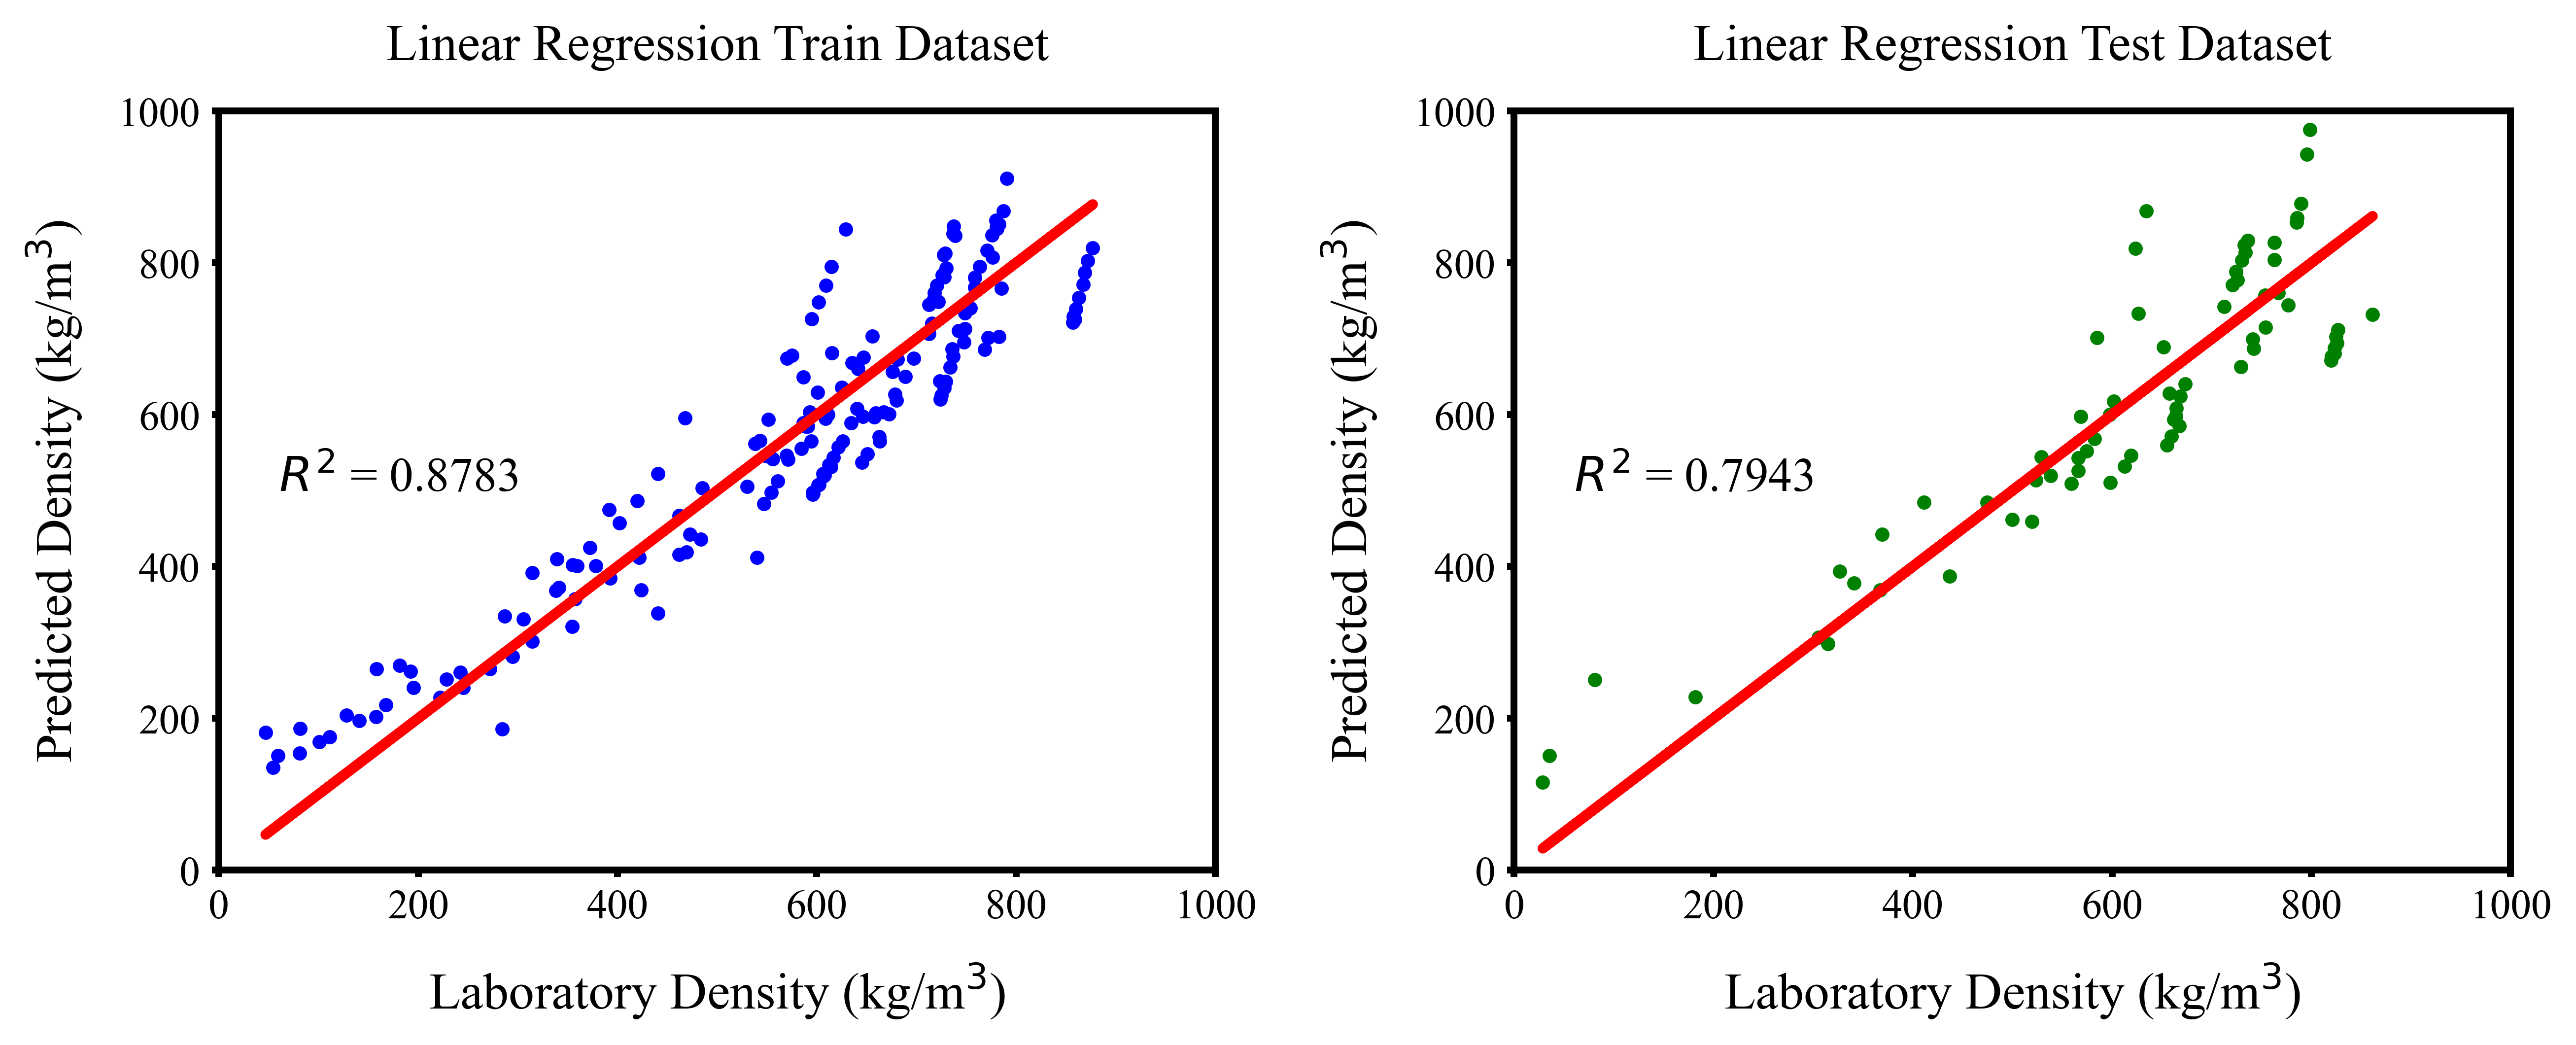

In [33]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"
fig1 = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , linear_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(linear_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("Linear Regression Train Dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(linear_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))
ax2 = plt.subplot(122)
plt.scatter(y_test , linear_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(linear_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("Linear Regression Test Dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(linear_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig1.savefig(figure_path + "Linear Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [34]:
lr_MSE_train = mean_squared_error(y_train,linear_regression_train_Prediction)
lr_MAE_train = mean_absolute_error(y_train,linear_regression_train_Prediction)
lr_MSE_test  = mean_squared_error(y_test,linear_regression_test_Prediction)
lr_MAE_test  = mean_absolute_error(y_test,linear_regression_test_Prediction)

In [35]:
print(lr_MSE_train , lr_MAE_train , lr_MSE_test ,lr_MAE_test )

5121.77054457907 60.094362595224666 7300.096118288923 69.67799565490522


## 2. SVR MODEL

In [36]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [37]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.9846250784991605 0.971013149533497


In [38]:
result_svr_train = pd.DataFrame()
result_svr_train["Density (train)"] = y_train
result_svr_train["Predicted Density (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Density (train)"] - result_svr_train["Predicted Density (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Density (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Density (test)"] = y_test
result_svr_test["Predicted Density (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Density (test)"] - result_svr_test["Predicted Density (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Density (test)"]




In [39]:
result_svr_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 570.136634   16.280209   
std         205.751928                 201.582233   19.602471   
min          46.800000                  58.003979    0.039017   
25%         440.500000                 440.599881    2.110678   
50%         611.300000                 619.781421    9.943386   
75%         726.212431                 724.168116   22.357060   
max         877.071303                 876.968755  117.388952   

       Absolute Error (%)  
count          169.000000  
mean             5.547857  
std             18.414143  
min              0.006240  
25%              0.366186  
50%              1.727243  
75%              4.303335  
max            202.142798

In [40]:
result_svr_test.describe()

Density (test)  Predicted Density (test)    Residues  \
count       73.000000                 73.000000   73.000000   
mean       616.617730                620.205240   20.192183   
std        189.709744                180.115393   25.096683   
min         28.600000                 37.937742    0.114046   
25%        559.284000                559.333561    6.473867   
50%        659.631000                648.755611   15.790506   
75%        753.580000                760.708594   24.914513   
max        861.560697                854.174589  196.352132   

       Absolute Error (%)  
count           73.000000  
mean             8.545206  
std             32.380773  
min              0.014520  
25%              1.008711  
50%              2.461042  
75%              4.439933  
max            243.010065

<ipython-input-41-a342d2e2c2ab>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-41-a342d2e2c2ab>:38: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


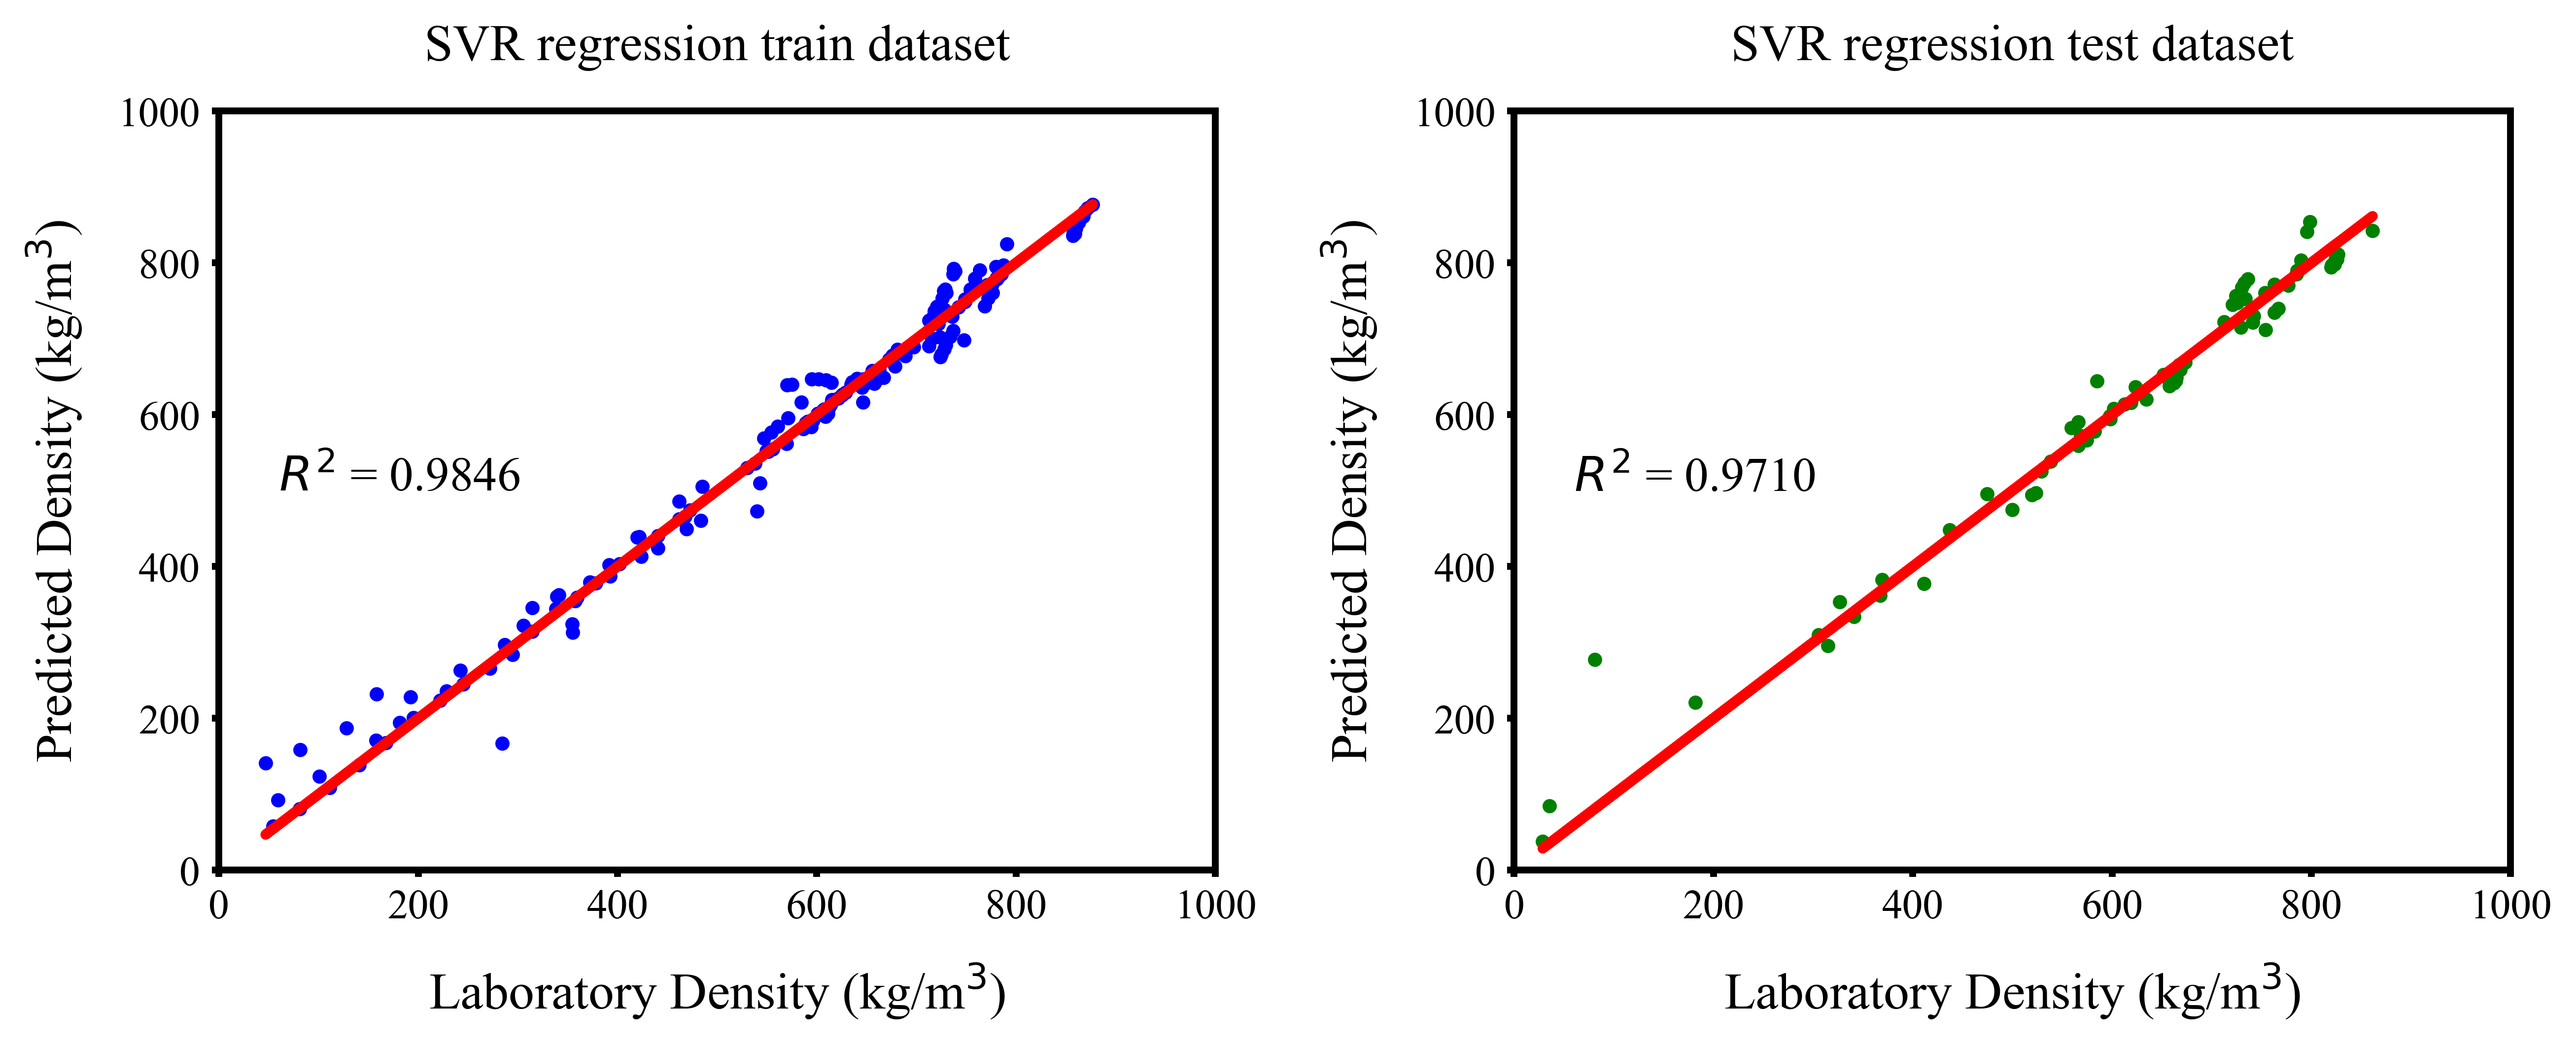

In [41]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_svr = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [42]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

647.0283543208664 16.280209036506655 1028.9397426852352 20.192183084128057


In [43]:
## 3. Decision Tree Model 

In [44]:
dt_regression_test_Prediction = dt_regression.predict(x_test)
dt_regression_train_Prediction = dt_regression.predict(x_train)


In [45]:
dt_regression_trainR2 = dt_regression.score(x_train,y_train)
dt_regression_testR2 = dt_regression.score(x_test,y_test)
print(dt_regression_trainR2 , dt_regression_testR2)

0.9965460184074276 0.9717704160467968


In [46]:
result_dt_train = pd.DataFrame()
result_dt_train["Density (train)"] = y_train
result_dt_train["Predicted Density (train)"] = dt_regression_train_Prediction
result_dt_train["Residues"] = abs(result_dt_train["Density (train)"] - result_dt_train["Predicted Density (train)"])
result_dt_train["Absolute Error (%)"] = result_dt_train["Residues"]*100/result_dt_train["Density (train)"]

result_dt_test = pd.DataFrame()
result_dt_test["Density (test)"] = y_test
result_dt_test["Predicted Density (test)"] = dt_regression_test_Prediction
result_dt_test["Residues"] = abs(result_dt_test["Density (test)"] - result_dt_test["Predicted Density (test)"])
result_dt_test["Absolute Error (%)"] = result_dt_test["Residues"]*100/result_dt_test["Density (test)"]




In [47]:
result_dt_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 566.664634    7.032441   
std         205.751928                 205.314100    9.821953   
min          46.800000                  59.300000    0.000000   
25%         440.500000                 440.500000    0.601209   
50%         611.300000                 610.100000    3.967936   
75%         726.212431                 726.482500    9.400000   
max         877.071303                 871.676303   59.200000   

       Absolute Error (%)  
count          169.000000  
mean             2.445782  
std              5.629035  
min              0.000000  
25%              0.078704  
50%              0.562388  
75%              1.692397  
max             38.589398

In [48]:
result_dt_test.describe()

Density (test)  Predicted Density (test)    Residues  \
count       73.000000                 73.000000   73.000000   
mean       616.617730                615.749141   19.736267   
std        189.709744                191.828047   24.920804   
min         28.600000                 59.300000    0.034000   
25%        559.284000                552.700000    5.057833   
50%        659.631000                648.098000   11.292791   
75%        753.580000                735.835000   29.933863   
max        861.560697                871.676303  180.896108   

       Absolute Error (%)  
count           73.000000  
mean             6.711594  
std             18.090011  
min              0.004512  
25%              0.748527  
50%              2.084469  
75%              4.792608  
max            136.188811

<ipython-input-49-40e6329858ec>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-49-40e6329858ec>:39: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


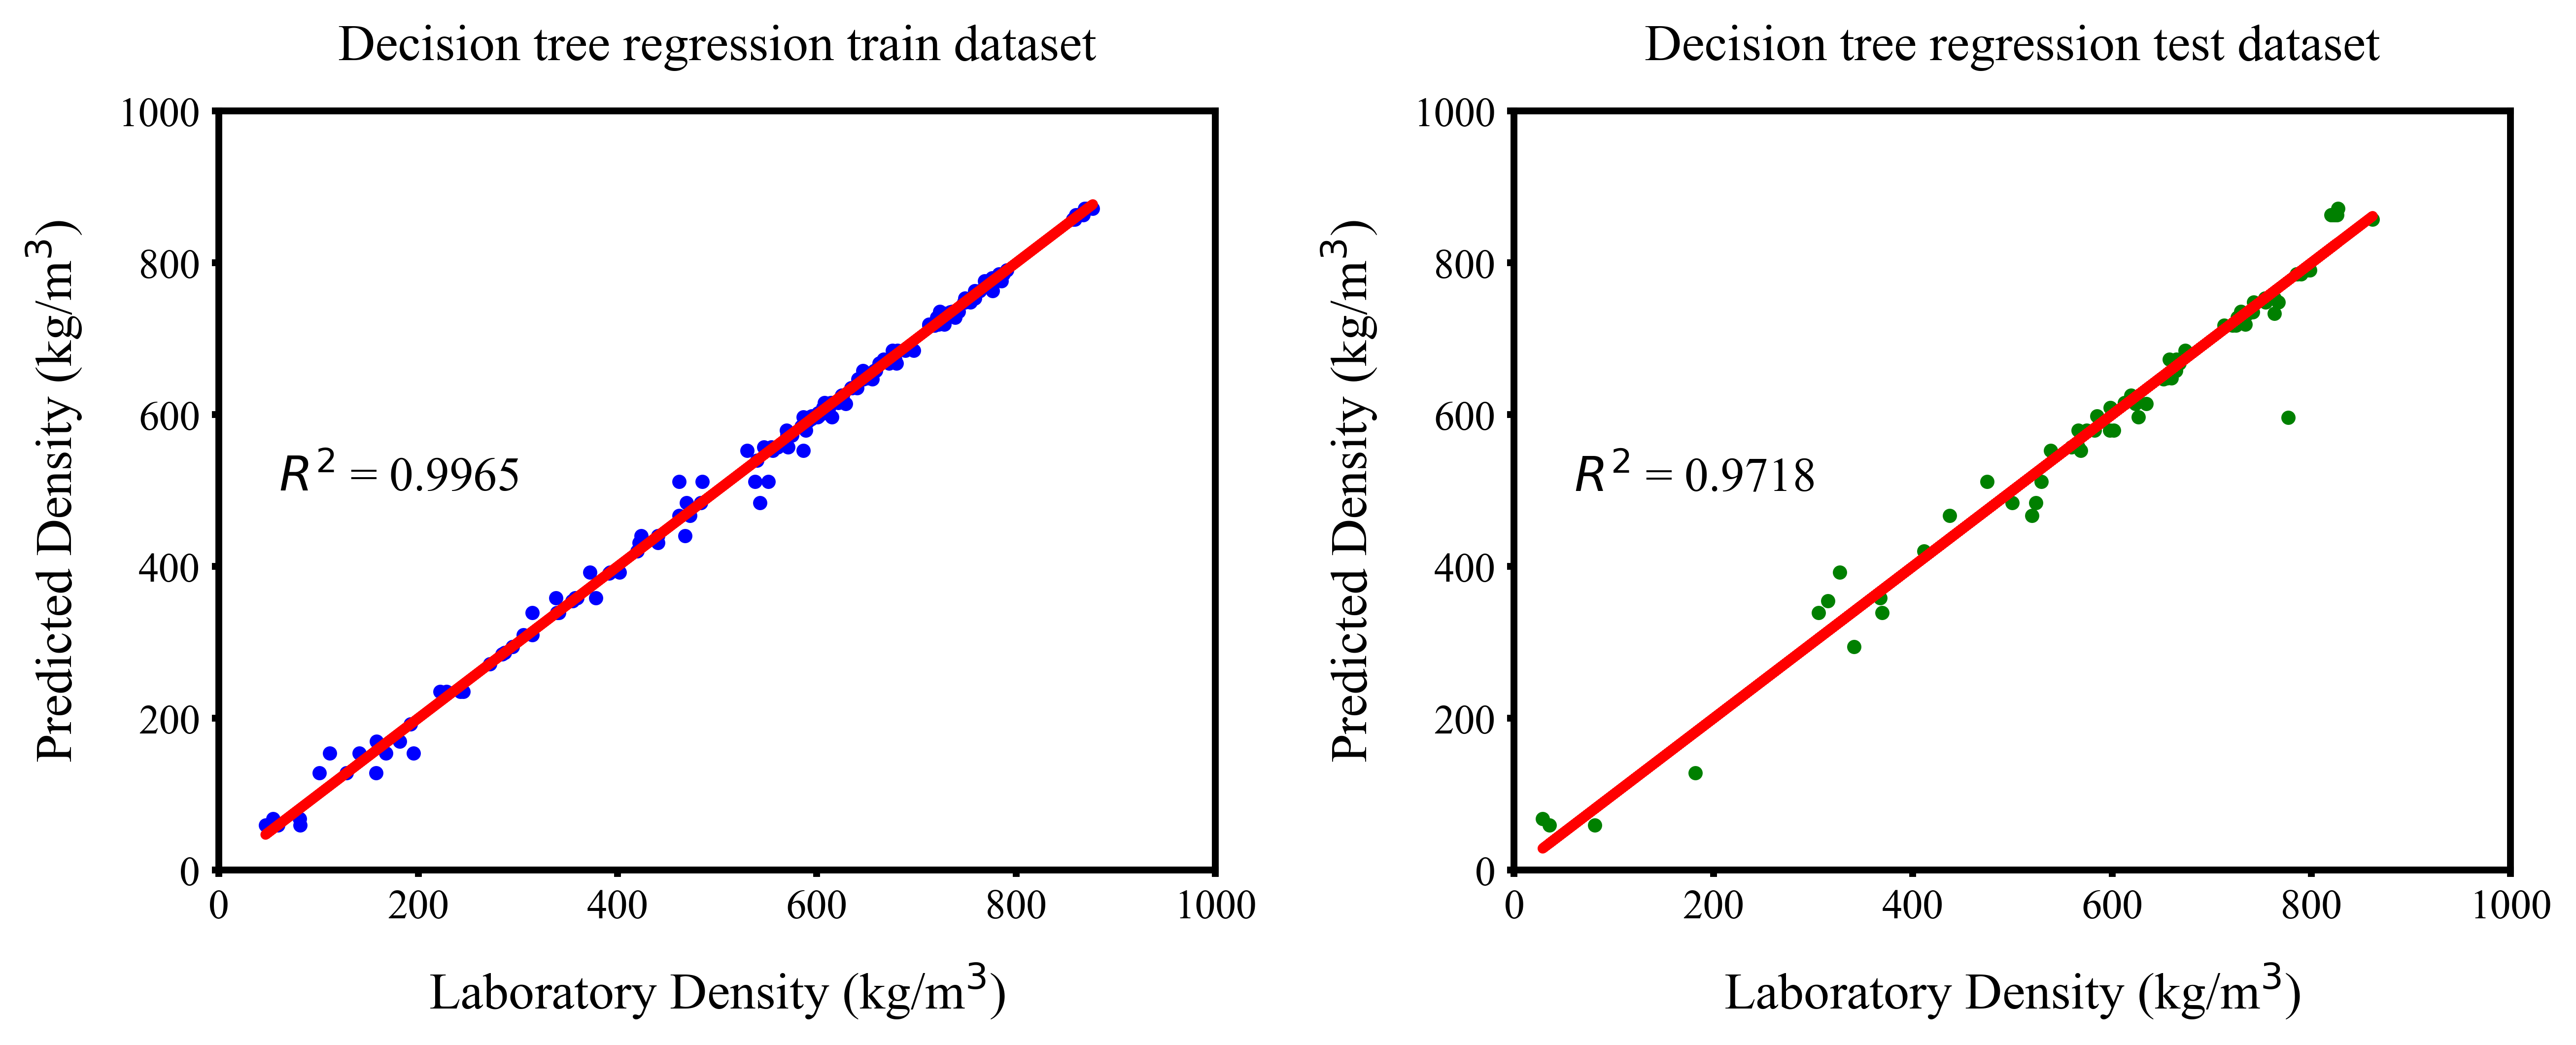

In [49]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_dt = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , dt_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(dt_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("Decision tree regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(dt_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

ax2 = plt.subplot(122)
plt.scatter(y_test , dt_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(dt_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("Decision tree regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(dt_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [50]:
dt_MSE_train = mean_squared_error(y_train,dt_regression_train_Prediction)
dt_MAE_train = mean_absolute_error(y_train,dt_regression_train_Prediction)
dt_MSE_test  = mean_squared_error(y_test,dt_regression_test_Prediction)
dt_MAE_test  = mean_absolute_error(y_test,dt_regression_test_Prediction)
print(dt_MSE_train , dt_MAE_train , dt_MSE_test ,  dt_MAE_test )

145.35515030594917 7.032440627218935 1002.0592227667544 19.736266924657535


## 4. Random forest Model 

In [51]:
rf_regression_test_Prediction = rf_regression.predict(x_test)
rf_regression_train_Prediction = rf_regression.predict(x_train)


In [52]:
rf_regression_trainR2 = rf_regression.score(x_train,y_train)
rf_regression_testR2 = rf_regression.score(x_test,y_test)
print(rf_regression_trainR2 , rf_regression_testR2)

0.9966264255514229 0.9443736592566072


In [53]:
result_rf_train = pd.DataFrame()
result_rf_train["Density (train)"] = y_train
result_rf_train["Predicted Density (train)"] = rf_regression_train_Prediction
result_rf_train["Residues"] = abs(result_rf_train["Density (train)"] - result_rf_train["Predicted Density (train)"])
result_rf_train["Absolute Error (%)"] = result_rf_train["Residues"]*100/result_rf_train["Density (train)"]

result_rf_test = pd.DataFrame()
result_rf_test["Density (test)"] = y_test
result_rf_test["Predicted Density (test)"] = rf_regression_test_Prediction
result_rf_test["Residues"] = abs(result_rf_test["Density (test)"] - result_rf_test["Predicted Density (test)"])
result_rf_test["Absolute Error (%)"] = result_rf_test["Residues"]*100/result_rf_test["Density (test)"]




In [54]:
result_rf_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 566.869602    6.714013   
std         205.751928                 202.060391    9.872696   
min          46.800000                  70.437500    0.032075   
25%         440.500000                 436.270258    1.376132   
50%         611.300000                 611.934338    3.039133   
75%         726.212431                 725.807271    8.044519   
max         877.071303                 869.026784   56.173603   

       Absolute Error (%)  
count          169.000000  
mean             2.685572  
std              8.902918  
min              0.003743  
25%              0.223192  
50%              0.517840  
75%              1.846006  
max             91.552707

In [55]:
result_rf_test.describe()

Density (test)  Predicted Density (test)    Residues  \
count       73.000000                 73.000000   73.000000   
mean       616.617730                606.745642   24.639268   
std        189.709744                166.629662   37.235128   
min         28.600000                 74.182500    0.052771   
25%        559.284000                559.842650    4.149038   
50%        659.631000                653.490569    8.402558   
75%        753.580000                728.496524   20.770833   
max        861.560697                857.411659  151.002500   

       Absolute Error (%)  
count           73.000000  
mean            12.000120  
std             43.017525  
min              0.007908  
25%              0.569251  
50%              1.310440  
75%              4.401084  
max            284.327195

<ipython-input-56-6325de0d37e6>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-56-6325de0d37e6>:40: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


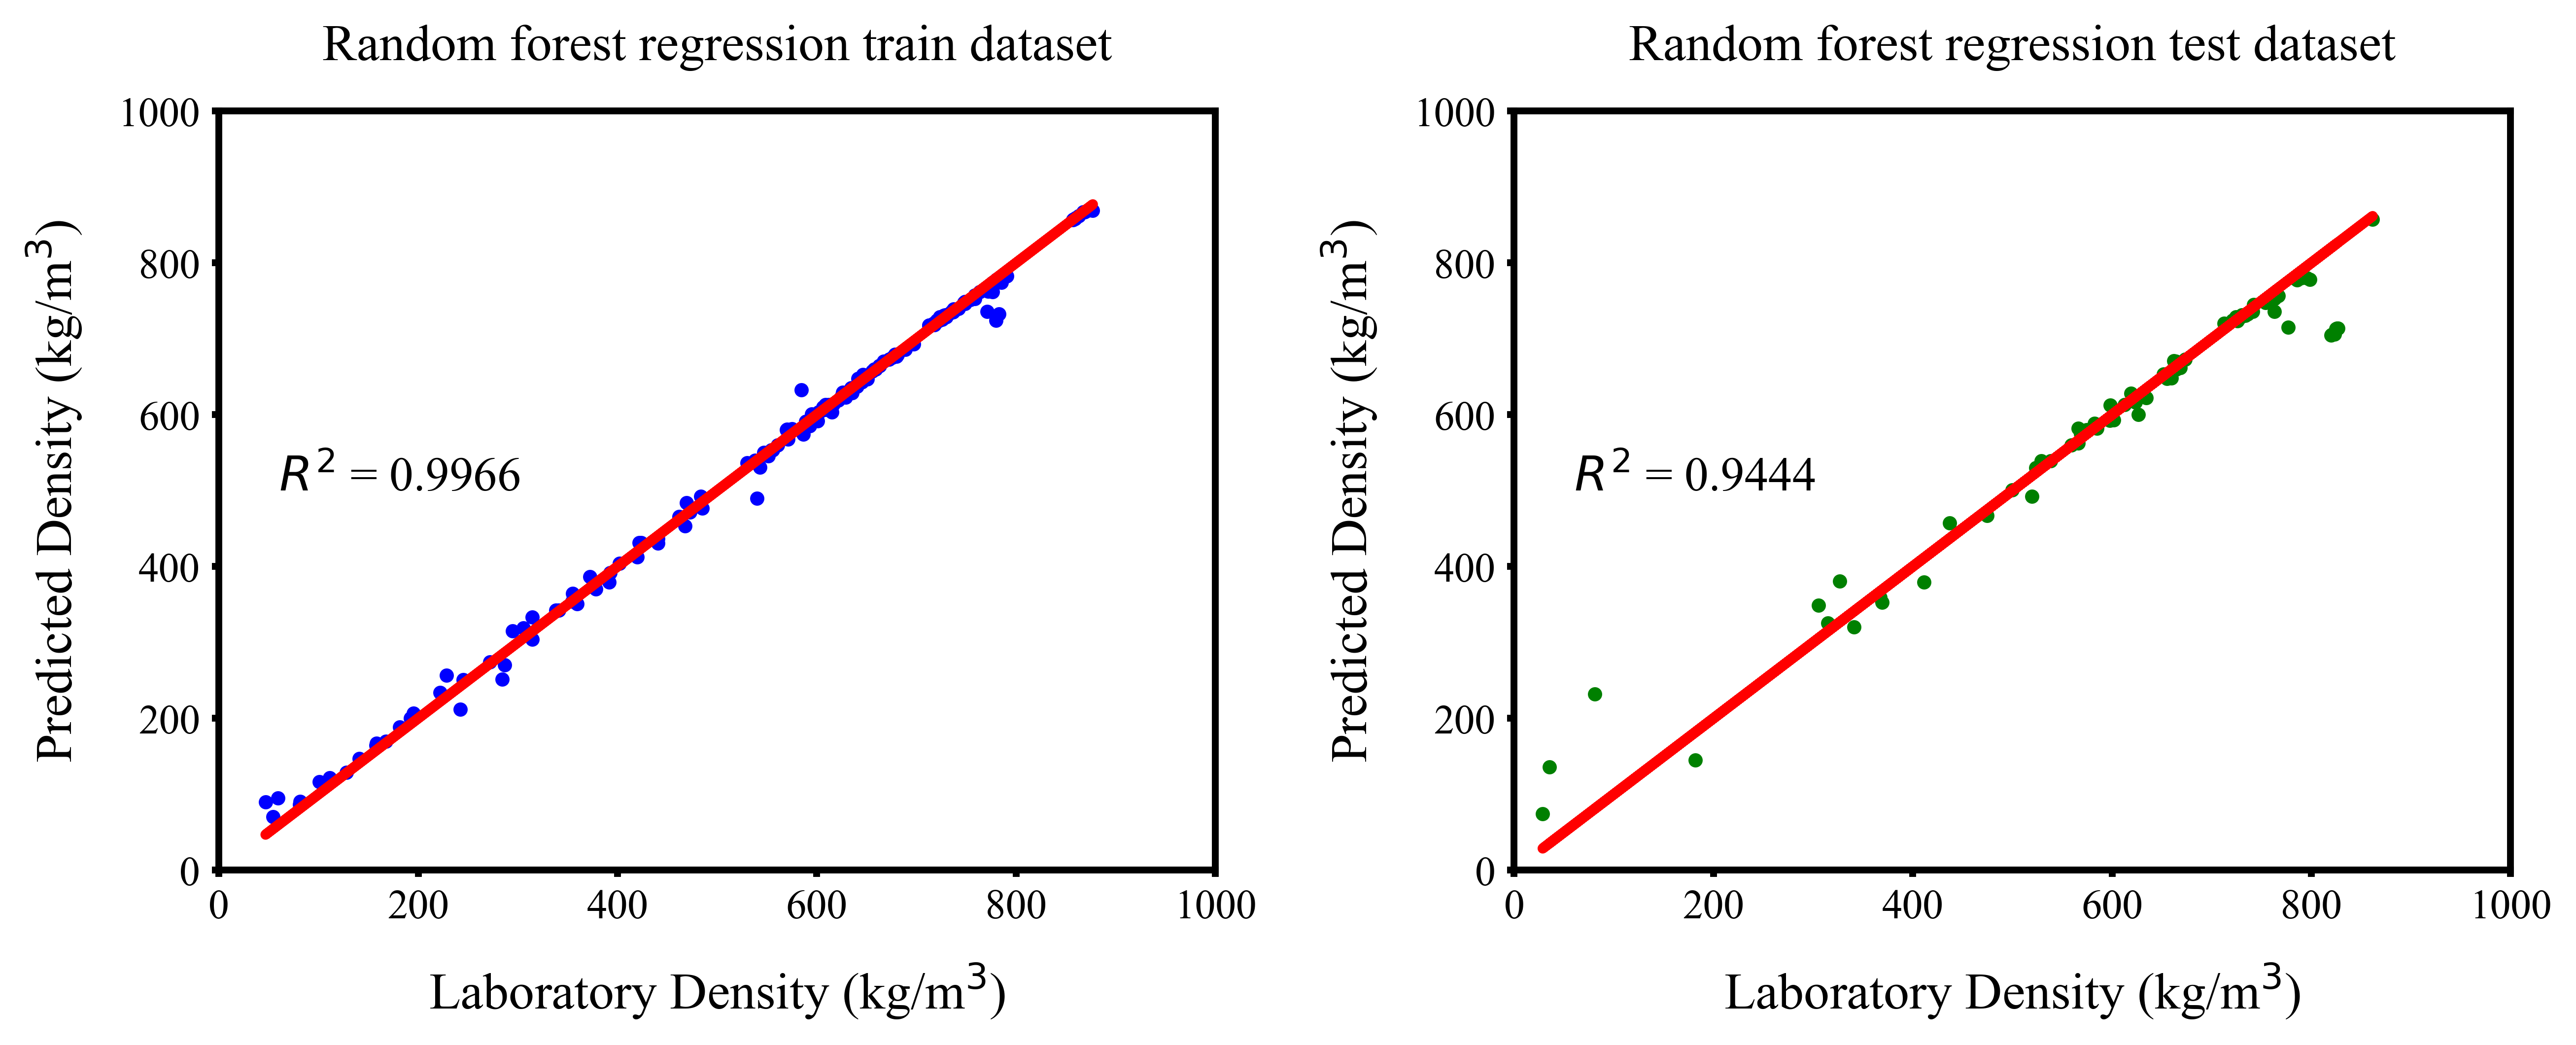

In [56]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_rf = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , rf_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(rf_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , rf_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(rf_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [57]:
rf_MSE_train = mean_squared_error(y_train,rf_regression_train_Prediction)
rf_MAE_train = mean_absolute_error(y_train,rf_regression_train_Prediction)
rf_MSE_test  = mean_squared_error(y_test,rf_regression_test_Prediction)
rf_MAE_test  = mean_absolute_error(y_test,rf_regression_test_Prediction)
print(rf_MSE_train , rf_MAE_train , rf_MSE_test , rf_MAE_test )

141.97134752997437 6.714012986686079 1974.5557661453954 24.639267722346954


## 5. KNN Model

In [58]:
knn_regression_test_Prediction = knn_regression.predict(x_test)
knn_regression_train_Prediction =knn_regression.predict(x_train)


In [59]:
knn_regression_trainR2 = knn_regression.score(x_train,y_train)
knn_regression_testR2 = knn_regression.score(x_test,y_test)
print(knn_regression_trainR2 , knn_regression_testR2)

0.9798666695197443 0.9739078544619262


In [60]:
result_knn_train = pd.DataFrame()
result_knn_train["Density (train)"] = y_train
result_knn_train["Predicted Density (train)"] = knn_regression_train_Prediction
result_knn_train["Residues"] = abs(result_knn_train["Density (train)"] - result_knn_train["Predicted Density (train)"])
result_knn_train["Absolute Error (%)"] = result_knn_train["Residues"]*100/result_knn_train["Density (train)"]

result_knn_test = pd.DataFrame()
result_knn_test["Density (test)"] = y_test
result_knn_test["Predicted Density (test)"] = knn_regression_test_Prediction
result_knn_test["Residues"] = abs(result_knn_test["Density (test)"] - result_knn_test["Predicted Density (test)"])
result_knn_test["Absolute Error (%)"] = result_knn_test["Residues"]*100/result_knn_test["Density (test)"]




In [61]:
result_knn_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 565.325676   14.617149   
std         205.751928                 202.127189   25.246558   
min          46.800000                  82.133333    0.019000   
25%         440.500000                 436.666667    1.293333   
50%         611.300000                 612.820660    5.636182   
75%         726.212431                 725.692667   19.133333   
max         877.071303                 872.575475  210.766667   

       Absolute Error (%)  
count          169.000000  
mean             5.111441  
std             14.394495  
min              0.002504  
25%              0.224212  
50%              0.954913  
75%              4.582461  
max            133.227981

In [62]:
result_knn_test.describe()

Density (test)  Predicted Density (test)    Residues  \
count       73.000000                 73.000000   73.000000   
mean       616.617730                618.146515   20.915236   
std        189.709744                186.835782   22.260459   
min         28.600000                 82.133333    0.044890   
25%        559.284000                554.074000    3.869960   
50%        659.631000                648.002000    8.132667   
75%        753.580000                738.240853   39.585333   
max        861.560697                869.428394  106.700000   

       Absolute Error (%)  
count           73.000000  
mean             9.946746  
std             32.876082  
min              0.006717  
25%              0.539191  
50%              1.903681  
75%              5.241412  
max            200.000000

<ipython-input-63-bfe9301718da>:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-63-bfe9301718da>:43: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


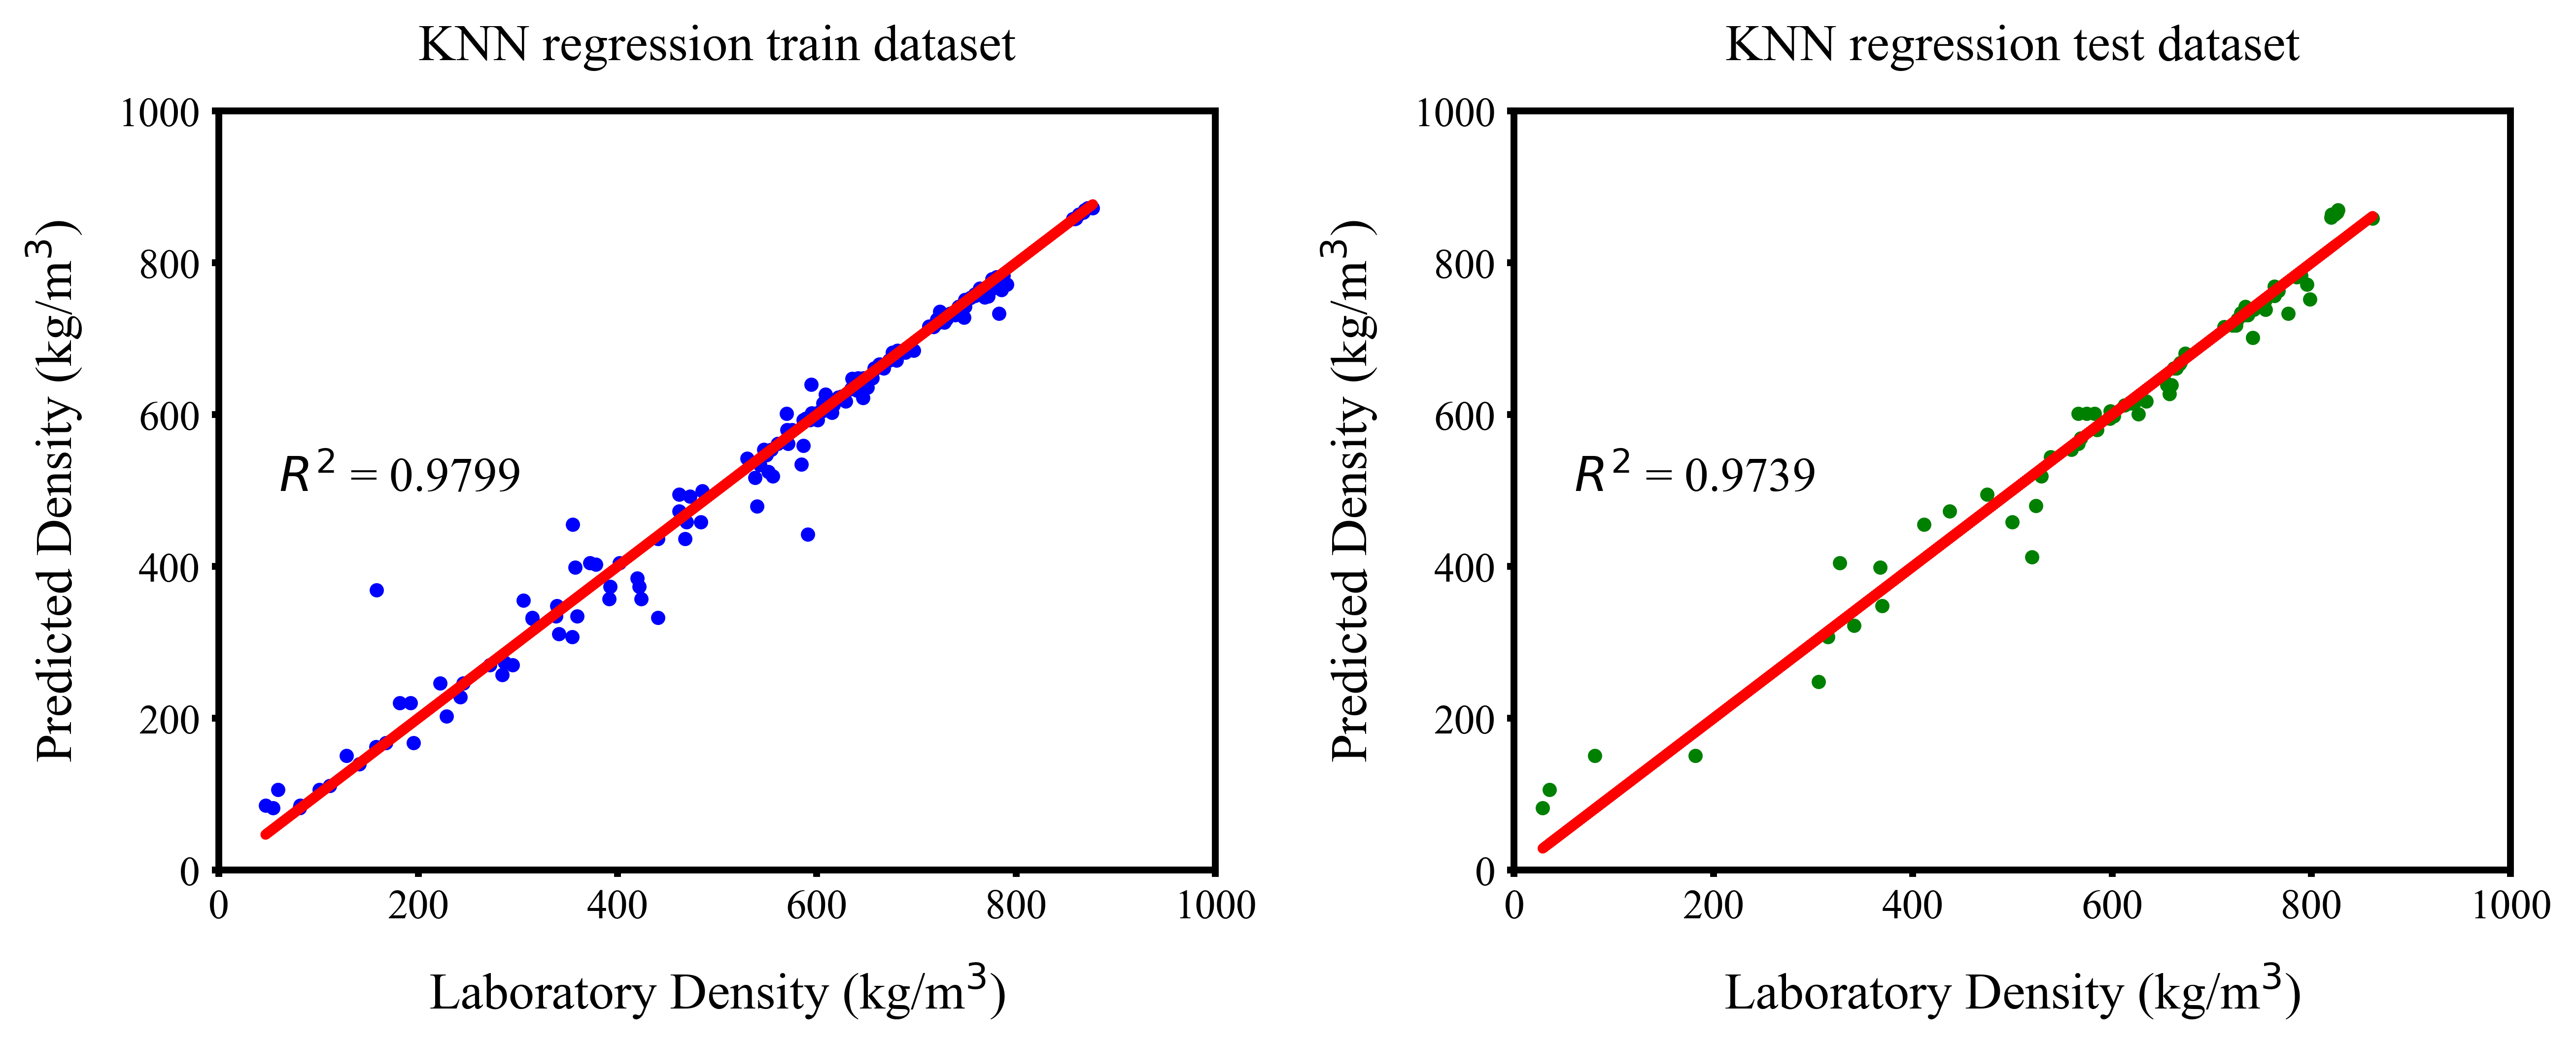

In [63]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_knn = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , knn_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(knn_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , knn_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(knn_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)   

fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [65]:
knn_MSE_train = mean_squared_error(y_train,knn_regression_train_Prediction)
knn_MAE_train = mean_absolute_error(y_train,knn_regression_train_Prediction)
knn_MSE_test  = mean_squared_error(y_test,knn_regression_test_Prediction)
knn_MAE_test  = mean_absolute_error(y_test,knn_regression_test_Prediction)
print(knn_MSE_train , knn_MAE_train , knn_MSE_test , knn_MAE_test )

847.2781917570571 14.617149106508878 926.1870497823127 20.915235552511415


## 6. ANN Model

In [66]:
ann_regression_test_Prediction = ann_regression.predict(x_test)
ann_regression_train_Prediction = ann_regression.predict(x_train)


In [67]:
from sklearn.metrics import r2_score
ann_regression_trainR2 = r2_score(y_train , ann_regression_train_Prediction)
ann_regression_testR2 = r2_score(y_test , ann_regression_test_Prediction)
print(ann_regression_trainR2 , ann_regression_testR2)

0.9934064918585365 0.9770271179393807


In [68]:
result_ann_train = pd.DataFrame()
result_ann_train["Density (train)"] = y_train
result_ann_train["Predicted Density (train)"] = ann_regression_train_Prediction
result_ann_train["Residues"] = abs(result_ann_train["Density (train)"] - result_ann_train["Predicted Density (train)"])
result_ann_train["Absolute Error (%)"] = result_ann_train["Residues"]*100/result_ann_train["Density (train)"]

result_ann_test = pd.DataFrame()
result_ann_test["Density (test)"] = y_test
result_ann_test["Predicted Density (test)"] = ann_regression_test_Prediction
result_ann_test["Residues"] = abs(result_ann_test["Density (test)"] - result_ann_test["Predicted Density (test)"])
result_ann_test["Absolute Error (%)"] = result_ann_test["Residues"]*100/result_ann_test["Density (test)"]




In [69]:
result_ann_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 566.606201   10.517703   
std         205.751928                 205.716766   12.955619   
min          46.800000                  63.906120    0.043859   
25%         440.500000                 454.599640    3.593003   
50%         611.300000                 611.292236    7.070353   
75%         726.212431                 726.924683   13.626652   
max         877.071303                 854.098511  136.212781   

       Absolute Error (%)  
count          169.000000  
mean             3.169894  
std              8.103117  
min              0.006048  
25%              0.600251  
50%              1.388801  
75%              2.612673  
max             86.101631

In [70]:
result_ann_test.describe()

Density (test)  Predicted Density (test)    Residues  \
count       73.000000                 73.000000   73.000000   
mean       616.617730                617.827881   18.620508   
std        189.709744                185.718170   21.800234   
min         28.600000                 71.258186    0.433765   
25%        559.284000                545.183716    5.252562   
50%        659.631000                653.557617   13.512152   
75%        753.580000                749.346924   25.073280   
max        861.560697                855.222778  159.320557   

       Absolute Error (%)  
count           73.000000  
mean             8.176244  
std             28.899570  
min              0.074303  
25%              1.034673  
50%              2.023878  
75%              3.839072  
max            195.671717

<ipython-input-71-47c89806b4f6>:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-71-47c89806b4f6>:43: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


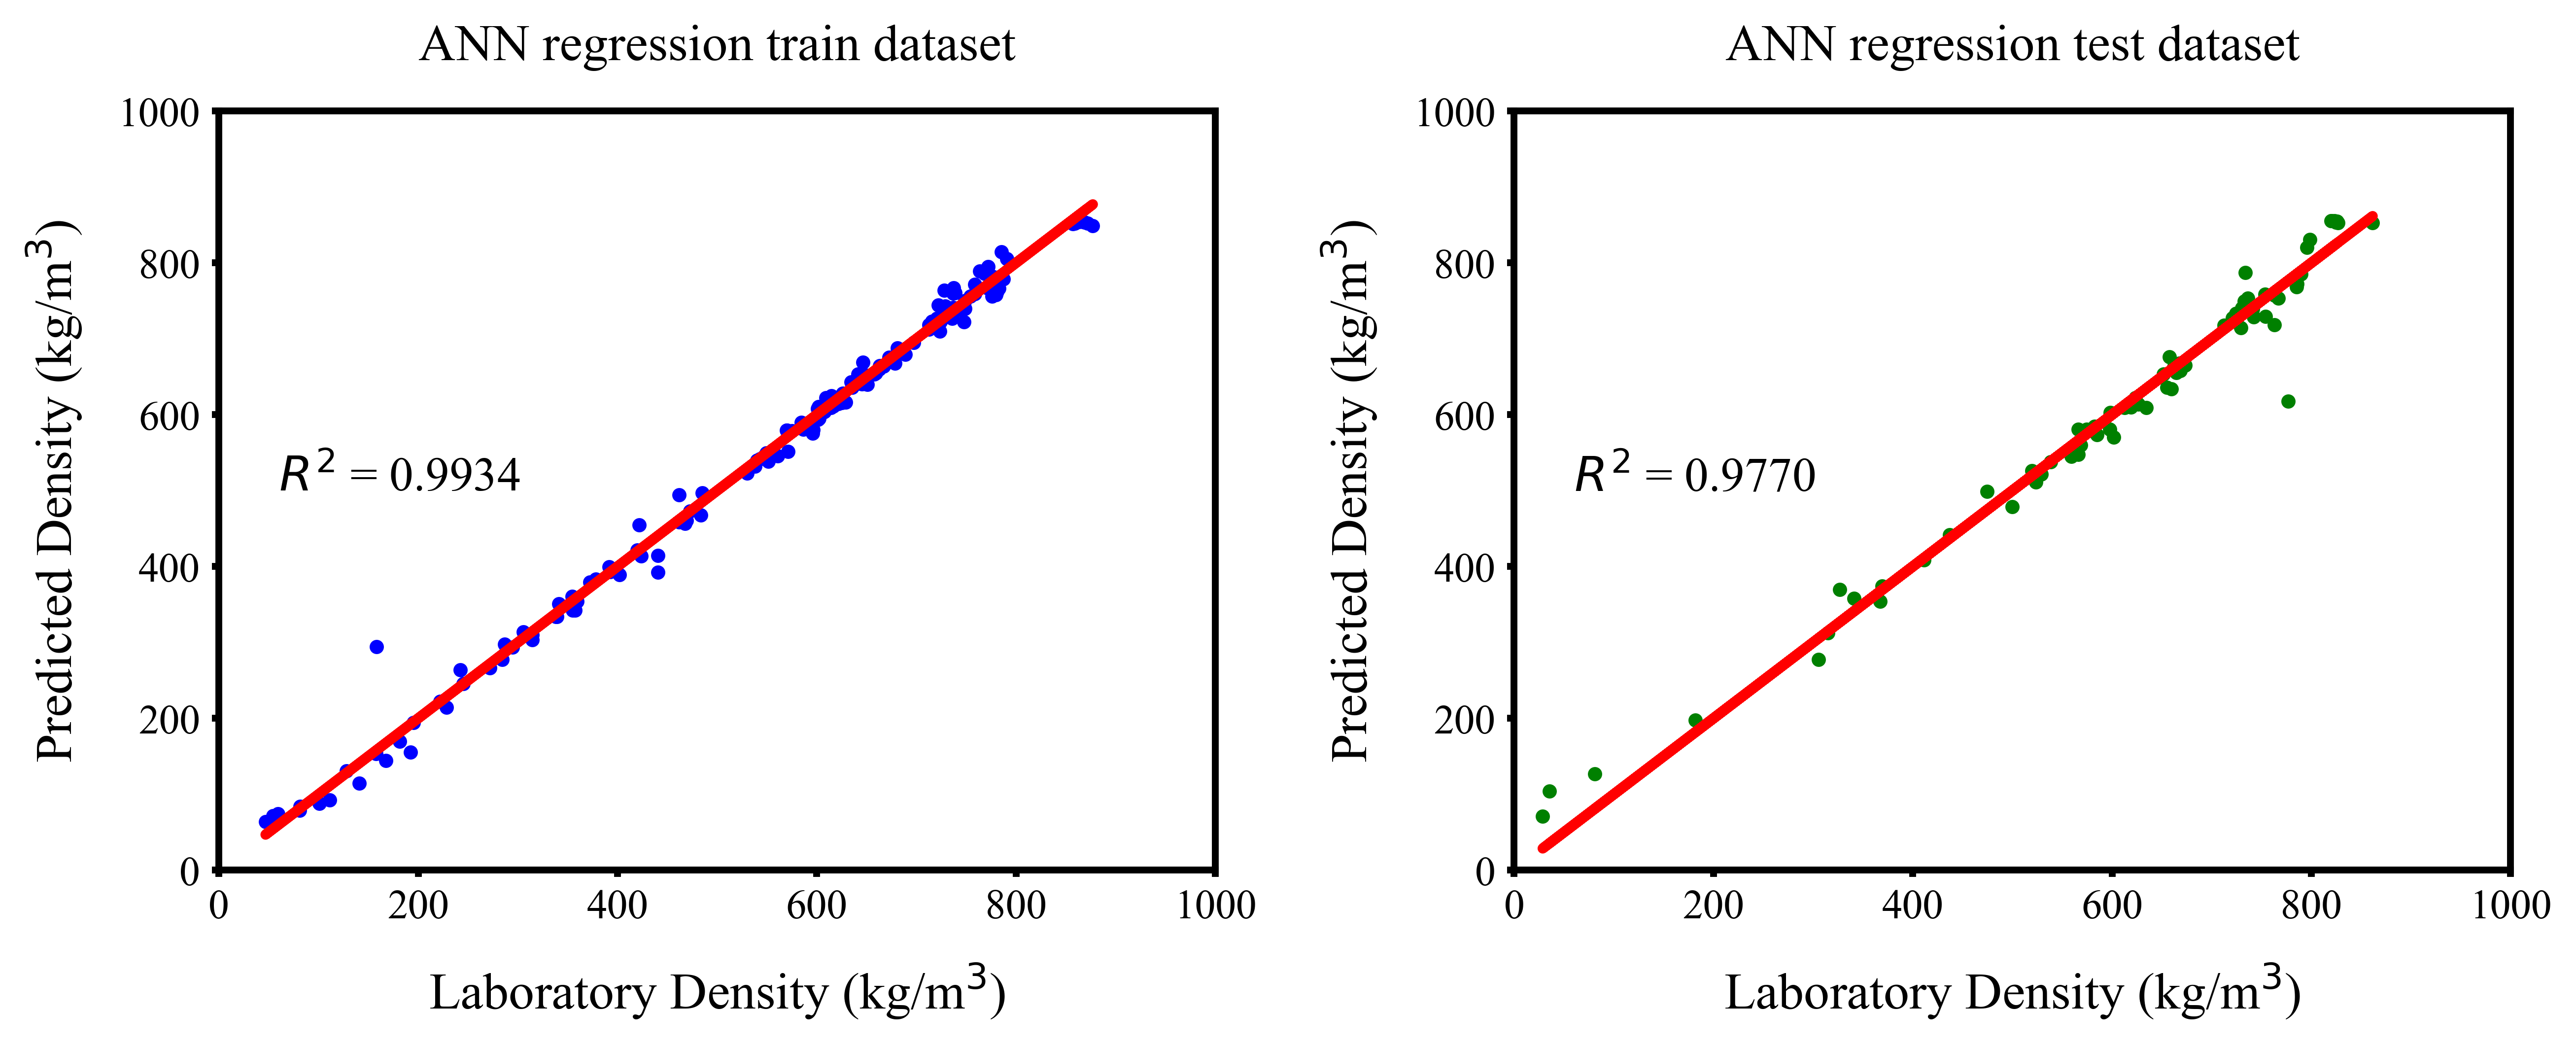

In [71]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_ann = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , ann_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(ann_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("ANN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(ann_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , ann_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(ann_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("ANN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(ann_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3) 

fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [72]:
ann_MSE_train = mean_squared_error(y_train,ann_regression_train_Prediction)
ann_MAE_train = mean_absolute_error(y_train,ann_regression_train_Prediction)
ann_MSE_test  = mean_squared_error(y_test,ann_regression_test_Prediction)
ann_MAE_test  = mean_absolute_error(y_test,ann_regression_test_Prediction)
print(ann_MSE_train , ann_MAE_train , ann_MSE_test , ann_MAE_test )

277.47697584924003 10.517703376334826 815.4632523291014 18.62050840364806


## 7. XGB Model

In [73]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [74]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.9998094217105273 0.9940273267813065


In [75]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Density (train)"] = y_train
result_xgb_train["Predicted Density (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Density (train)"] - result_xgb_train["Predicted Density (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Density (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Density (test)"] = y_test
result_xgb_test["Predicted Density (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Density (test)"] - result_xgb_test["Predicted Density (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Density (test)"]




<ipython-input-76-26833d3ea9d3>:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-76-26833d3ea9d3>:43: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


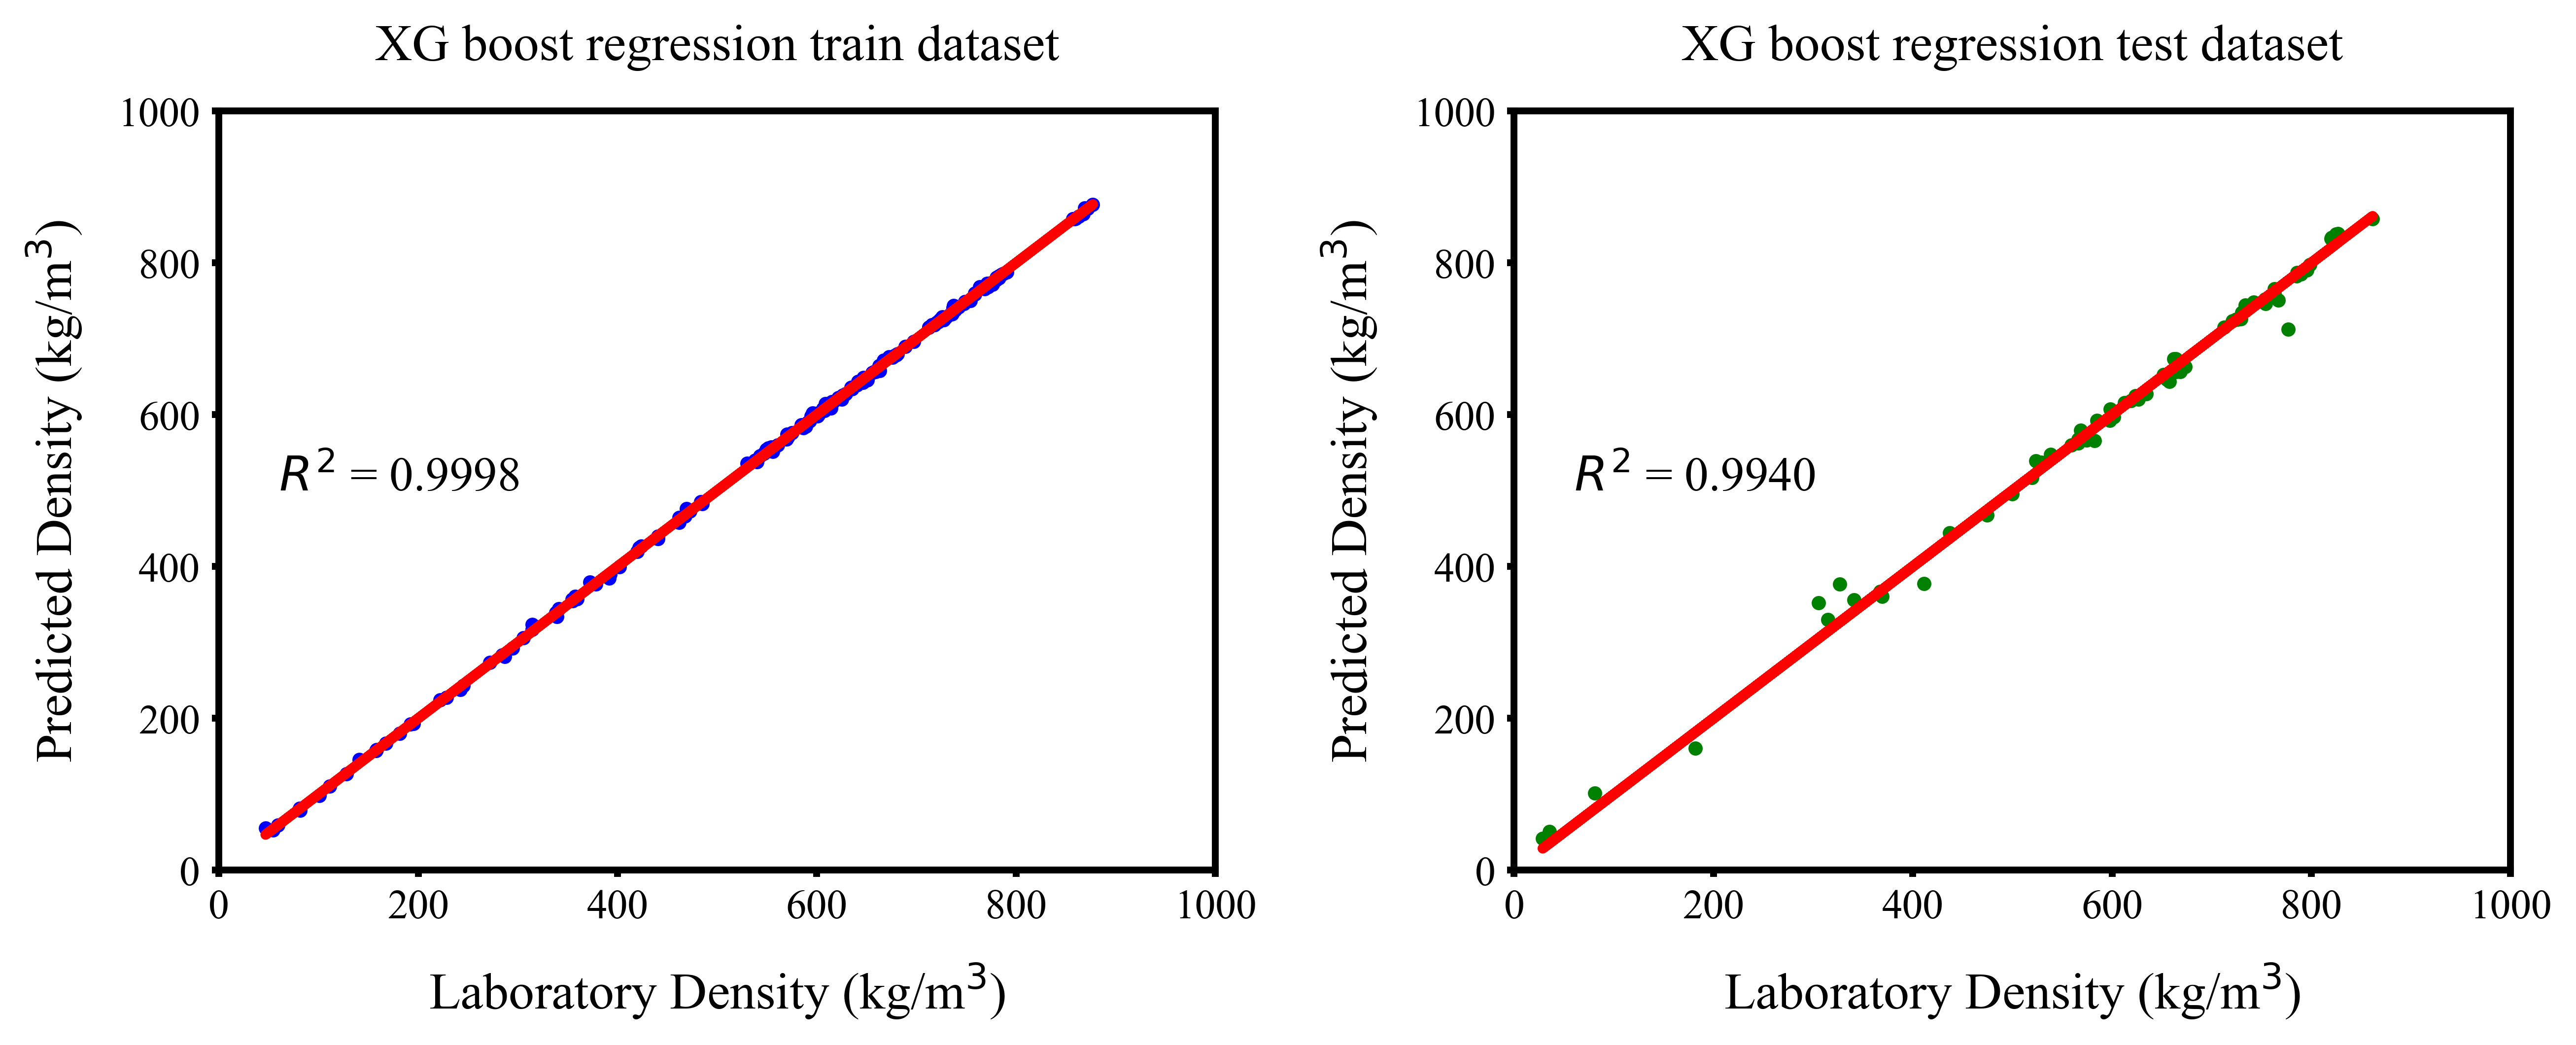

In [76]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [77]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

8.02017473715728 2.2018803405949496 212.01064433982606 9.55413451750455


In [78]:
result_xgb_train.describe()

Density (train)  Predicted Density (train)    Residues  \
count       169.000000                 169.000000  169.000000   
mean        567.090534                 567.085266    2.201880   
std         205.751928                 205.606522    1.786275   
min          46.800000                  52.983833    0.004639   
25%         440.500000                 439.950562    0.846082   
50%         611.300000                 610.084229    1.679074   
75%         726.212431                 725.727417    3.227399   
max         877.071303                 877.056580    9.434686   

       Absolute Error (%)  
count          169.000000  
mean             0.597067  
std              1.487011  
min              0.000646  
25%              0.149606  
50%              0.302638  
75%              0.634525  
max             18.295865

In [79]:
result_xgb_test.describe()

Density (test)  Predicted Density (test)   Residues  Absolute Error (%)
count       73.000000                 73.000000  73.000000           73.000000
mean       616.617730                617.964172   9.554135            3.358936
std        189.709744                186.796570  11.063722            8.126036
min         28.600000                 41.743454   0.230200            0.038199
25%        559.284000                559.750305   3.018919            0.413923
50%        659.631000                656.885742   7.245953            1.164733
75%        753.580000                746.442017  11.477158            1.694471
max        861.560697                858.135193  64.348083           45.956133

In [80]:
model_comp_test = pd.DataFrame({
    'Model Name' : ["Linear Regression" , 'SVM' , 'Decision Tree' , 'Random Forest' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [linear_regression_testR2  , svr_regression_testR2 ,dt_regression_testR2,rf_regression_testR2,knn_regression_testR2,ann_regression_testR2,xgb_regression_testR2],
    'MSE' : [lr_MSE_test  , svr_MSE_test , dt_MSE_test ,  rf_MSE_test ,knn_MSE_test,ann_MSE_test,xgb_MSE_test],
    'MAE' : [lr_MAE_test  , svr_MAE_test , dt_MAE_test ,  rf_MAE_test ,knn_MAE_test,ann_MAE_test,xgb_MAE_test],
    '%AAD' : [result_lr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_test.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_test.describe()["Absolute Error (%)"].loc["mean"],
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [81]:
model_comp_test

Model Name  R Square          MSE        MAE       %AAD
0  Linear Regression  0.794345  7300.096118  69.677996  21.543024
1                SVM  0.971013  1028.939743  20.192183   8.545206
2      Decision Tree  0.971770  1002.059223  19.736267   6.711594
3      Random Forest  0.944374  1974.555766  24.639268  12.000120
4                KNN  0.973908   926.187050  20.915236   9.946746
5                ANN  0.977027   815.463252  18.620508   8.176244
6                XGB  0.994027   212.010644   9.554135   3.358936

In [82]:
model_comp_train = pd.DataFrame({
    'Model Name' : ["Linear Regression"  , 'SVM' , 'Decision Tree' , 'Random Forest' , 'KNN','ANN',"XGB"],
    'R Square' : [linear_regression_trainR2  , svr_regression_trainR2 ,dt_regression_trainR2,rf_regression_trainR2,knn_regression_trainR2,ann_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [lr_MSE_train , svr_MSE_train , dt_MSE_train ,  rf_MSE_train ,knn_MSE_train,ann_MSE_train,xgb_MSE_train],
    'MAE' : [lr_MAE_train  , svr_MAE_train , dt_MAE_train ,  rf_MAE_train ,knn_MAE_train,ann_MAE_train,xgb_MSE_train],
    '%AAD' : [result_lr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_train.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [83]:
model_comp_train

Model Name  R Square          MSE        MAE       %AAD
0  Linear Regression  0.878295  5121.770545  60.094363  16.405060
1                SVM  0.984625   647.028354  16.280209   5.547857
2      Decision Tree  0.996546   145.355150   7.032441   2.445782
3      Random Forest  0.996626   141.971348   6.714013   2.685572
4                KNN  0.979867   847.278192  14.617149   5.111441
5                ANN  0.993406   277.476976  10.517703   3.169894
6                XGB  0.999809     8.020175   8.020175   0.597067

## Preparing Dataframe containing result of all models evaluation parameters

#### 1. For test dataset

In [84]:


model_comp_test_paper = pd.DataFrame({
    'Model Name' : ['LR','SVR' , 'DT' , 'RF' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [linear_regression_testR2, svr_regression_testR2 ,dt_regression_testR2,rf_regression_testR2,knn_regression_testR2,ann_regression_testR2,xgb_regression_testR2],
    'MSE' : [lr_MSE_test,svr_MSE_test , dt_MSE_test ,  rf_MSE_test ,knn_MSE_test,ann_MSE_test,xgb_MSE_test],
    'MAE' : [lr_MAE_test,svr_MAE_test , dt_MAE_test ,  rf_MAE_test ,knn_MAE_test,ann_MAE_test,xgb_MAE_test],
    '%AARD' : [result_lr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_test.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_test.describe()["Absolute Error (%)"].loc["mean"],
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [85]:
model_comp_test_paper.to_excel(export_data_path+"Result_Compare_test.xlsx",index = False)

#### 2. For train dataset

In [86]:
model_comp_train_paper = pd.DataFrame({
    'Model Name' : ['LR','SVR' , 'DT' , 'RF' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [linear_regression_trainR2,svr_regression_trainR2 ,dt_regression_trainR2,rf_regression_trainR2,knn_regression_trainR2,ann_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [lr_MSE_train,svr_MSE_train , dt_MSE_train ,  rf_MSE_train ,knn_MSE_train,ann_MSE_train,xgb_MSE_train],
    'MAE' : [ lr_MAE_train , svr_MAE_train , dt_MAE_train ,  rf_MAE_train ,knn_MAE_train,ann_MAE_train,xgb_MSE_train],
    '%AARD' : [result_lr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_train.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [87]:
model_comp_train_paper.to_excel(export_data_path+"Result_Compare_train.xlsx")

In [88]:
#Creating Dataframe For bar plot by adding label train and test and merging both dataframe

model_comp_test_paper["Label"] = "Test"
model_comp_train_paper["Label"] = "Train"
Final_bar_plot = model_comp_test_paper.append(model_comp_train_paper)
Final_bar_plot

Model Name  R Square          MSE        MAE      %AARD  Label
0         LR  0.794345  7300.096118  69.677996  21.543024   Test
1        SVR  0.971013  1028.939743  20.192183   8.545206   Test
2         DT  0.971770  1002.059223  19.736267   6.711594   Test
3         RF  0.944374  1974.555766  24.639268  12.000120   Test
4        KNN  0.973908   926.187050  20.915236   9.946746   Test
5        ANN  0.977027   815.463252  18.620508   8.176244   Test
6        XGB  0.994027   212.010644   9.554135   3.358936   Test
0         LR  0.878295  5121.770545  60.094363  16.405060  Train
1        SVR  0.984625   647.028354  16.280209   5.547857  Train
2         DT  0.996546   145.355150   7.032441   2.445782  Train
3         RF  0.996626   141.971348   6.714013   2.685572  Train
4        KNN  0.979867   847.278192  14.617149   5.111441  Train
5        ANN  0.993406   277.476976  10.517703   3.169894  Train
6        XGB  0.999809     8.020175   8.020175   0.597067  Train

## Bar plot which comparing the % AARD values

<ipython-input-91-fb2a89b2027f>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_aard.savefig(figure_path + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-91-fb2a89b2027f>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_aard.savefig(figure_path + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")


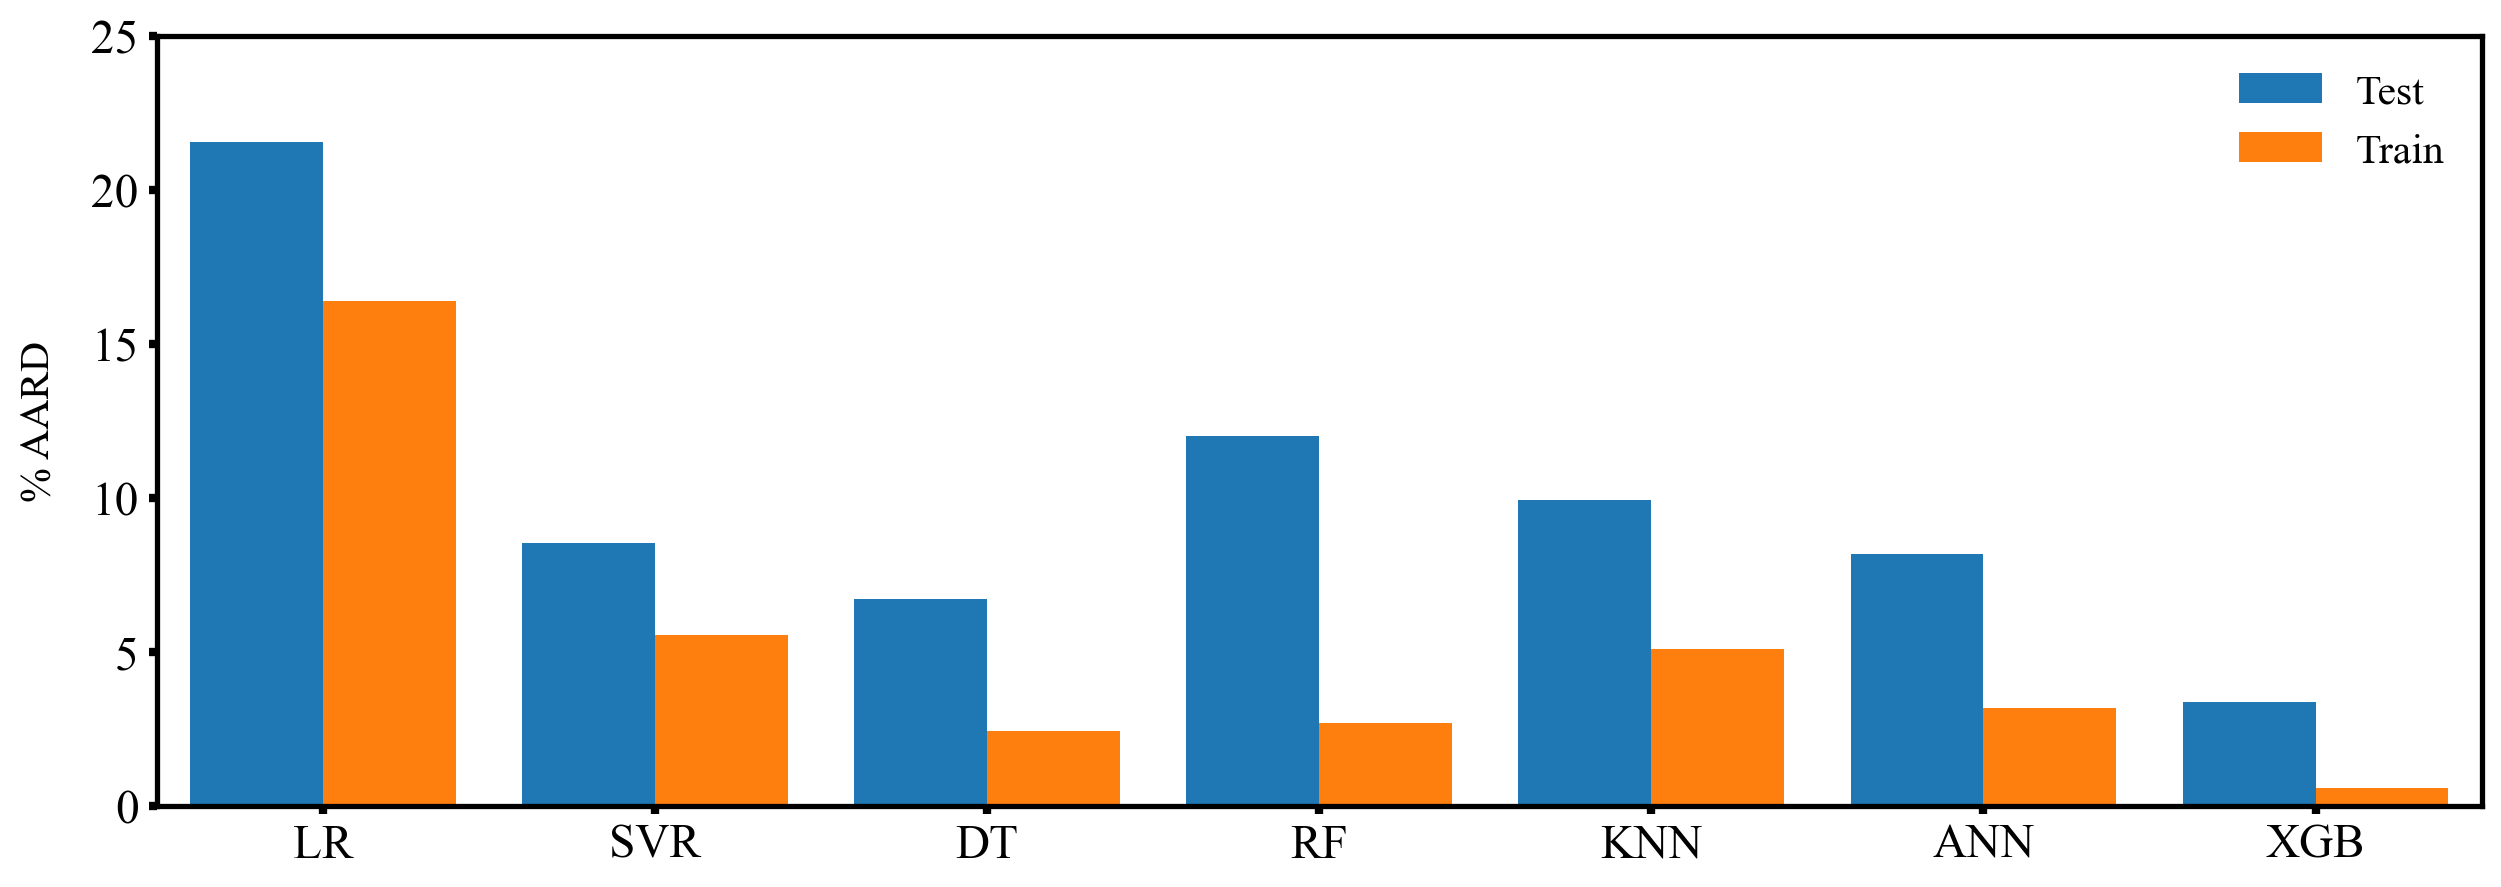

In [91]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig_aard = plt.figure(figsize = (15,5) , dpi = 200)

ax = sns.barplot( x = "Model Name" , y = "%AARD" , data = Final_bar_plot , hue = "Label" , saturation = 10)

plt.legend(fontsize = 15 ,  frameon=False )
plt.ylabel("% AARD" , fontsize = 15 , labelpad = 12)
plt.ylim((0,25))
ax.set(xlabel = None)


ax = fig_aard.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)

fig_aard.savefig(figure_path + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-93-1c4b096acfa2>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-93-1c4b096acfa2>:25: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


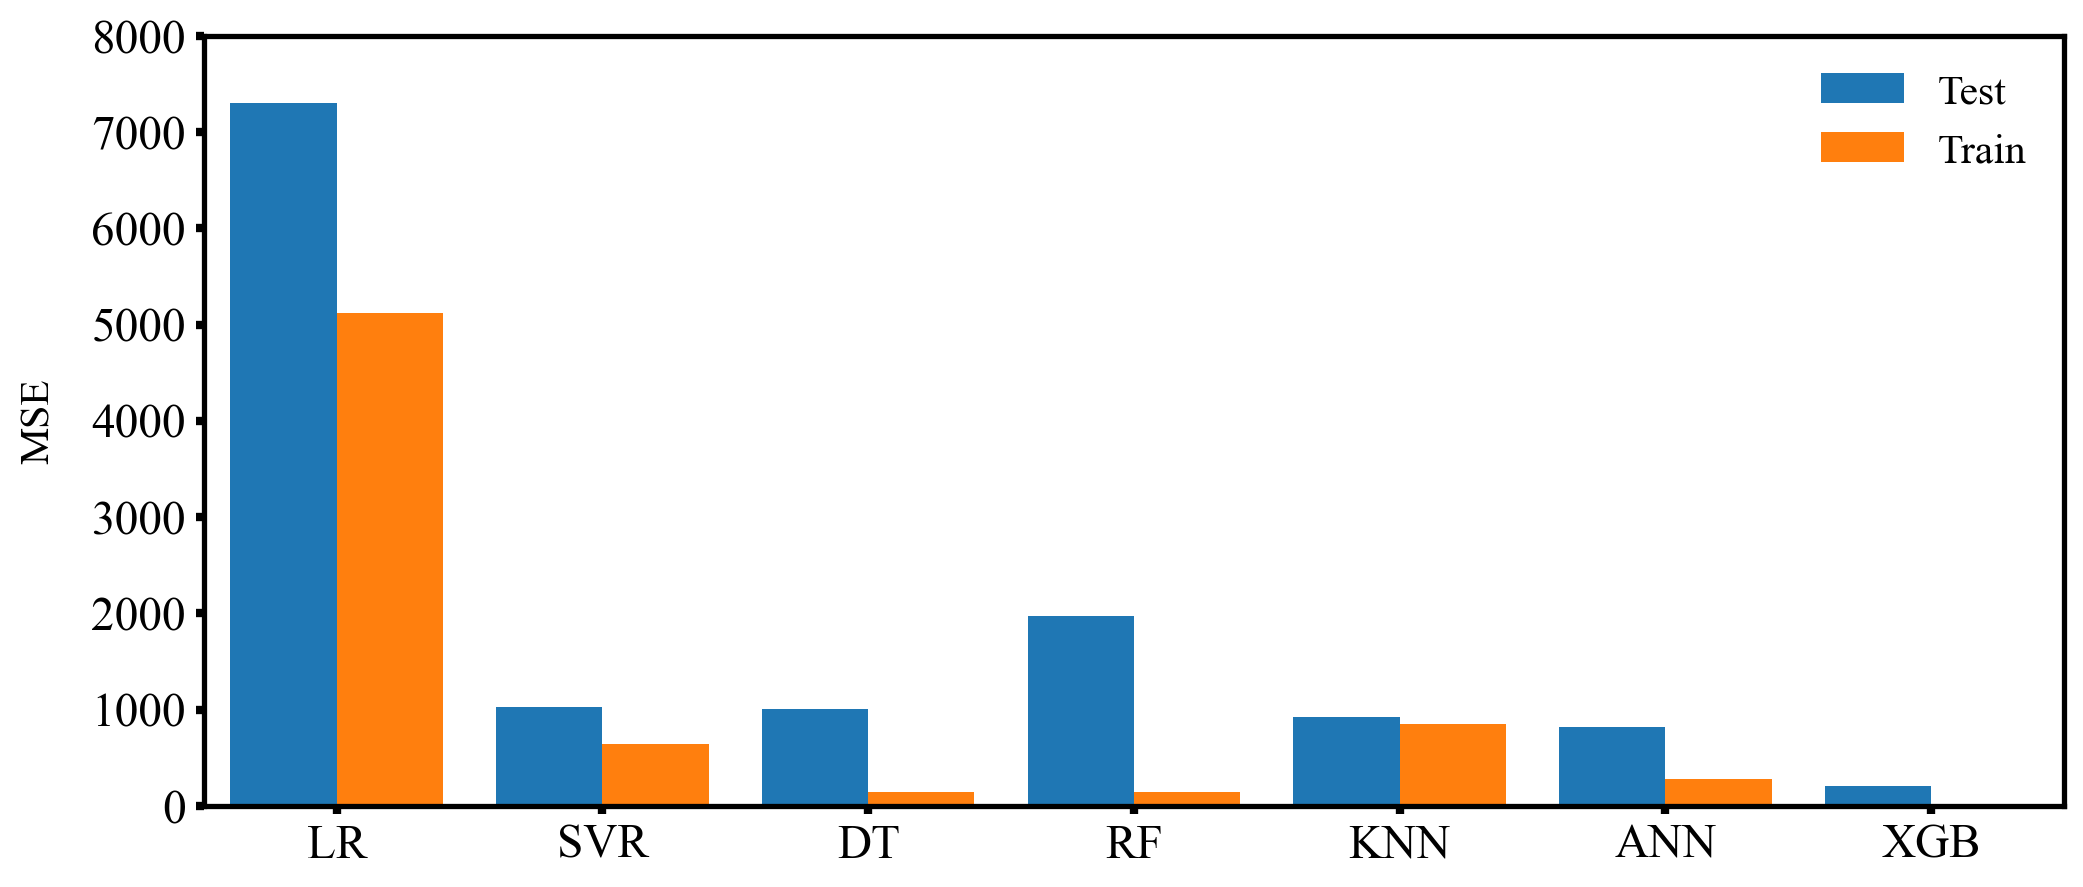

In [93]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig_mse = plt.figure(figsize = (12,5) , dpi = 200)

ax = sns.barplot( x = "Model Name" , y = "MSE" , data = Final_bar_plot , hue = "Label" , saturation = 10)

plt.legend(fontsize = 15 ,  frameon=False )
plt.ylabel("MSE" , fontsize = 15 , labelpad = 12)
ax.set(xlabel = None)
plt.ylim((0,8000))


ax = fig_mse.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)

fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

## Creating Dataframes for closeness result plots and comaparision for residuals plots

In [95]:
lr_plot_result = result_lr_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)
svr_plot_result = result_svr_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)
dt_plot_result = result_dt_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)
rf_plot_result = result_rf_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)
knn_plot_result = result_knn_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)
ann_plot_result = result_ann_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)
xgb_plot_result = result_xgb_test[["Density (test)","Predicted Density (test)"]].reset_index(drop=True)

lr_plot_result["Residual"] = lr_plot_result["Density (test)"] - lr_plot_result["Predicted Density (test)"]
svr_plot_result["Residual"] = svr_plot_result["Density (test)"] - svr_plot_result["Predicted Density (test)"]
dt_plot_result["Residual"] = dt_plot_result["Density (test)"] - dt_plot_result["Predicted Density (test)"]
rf_plot_result["Residual"] = rf_plot_result["Density (test)"] - rf_plot_result["Predicted Density (test)"]
knn_plot_result["Residual"] = knn_plot_result["Density (test)"] - knn_plot_result["Predicted Density (test)"]
ann_plot_result["Residual"] = ann_plot_result["Density (test)"] - ann_plot_result["Predicted Density (test)"]
xgb_plot_result["Residual"] = xgb_plot_result["Density (test)"] - xgb_plot_result["Predicted Density (test)"]

## scatter plot which comparing the residuals values for entire dataset for each saturation pressure records


<ipython-input-110-4ad386548eaf>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-110-4ad386548eaf>:33: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


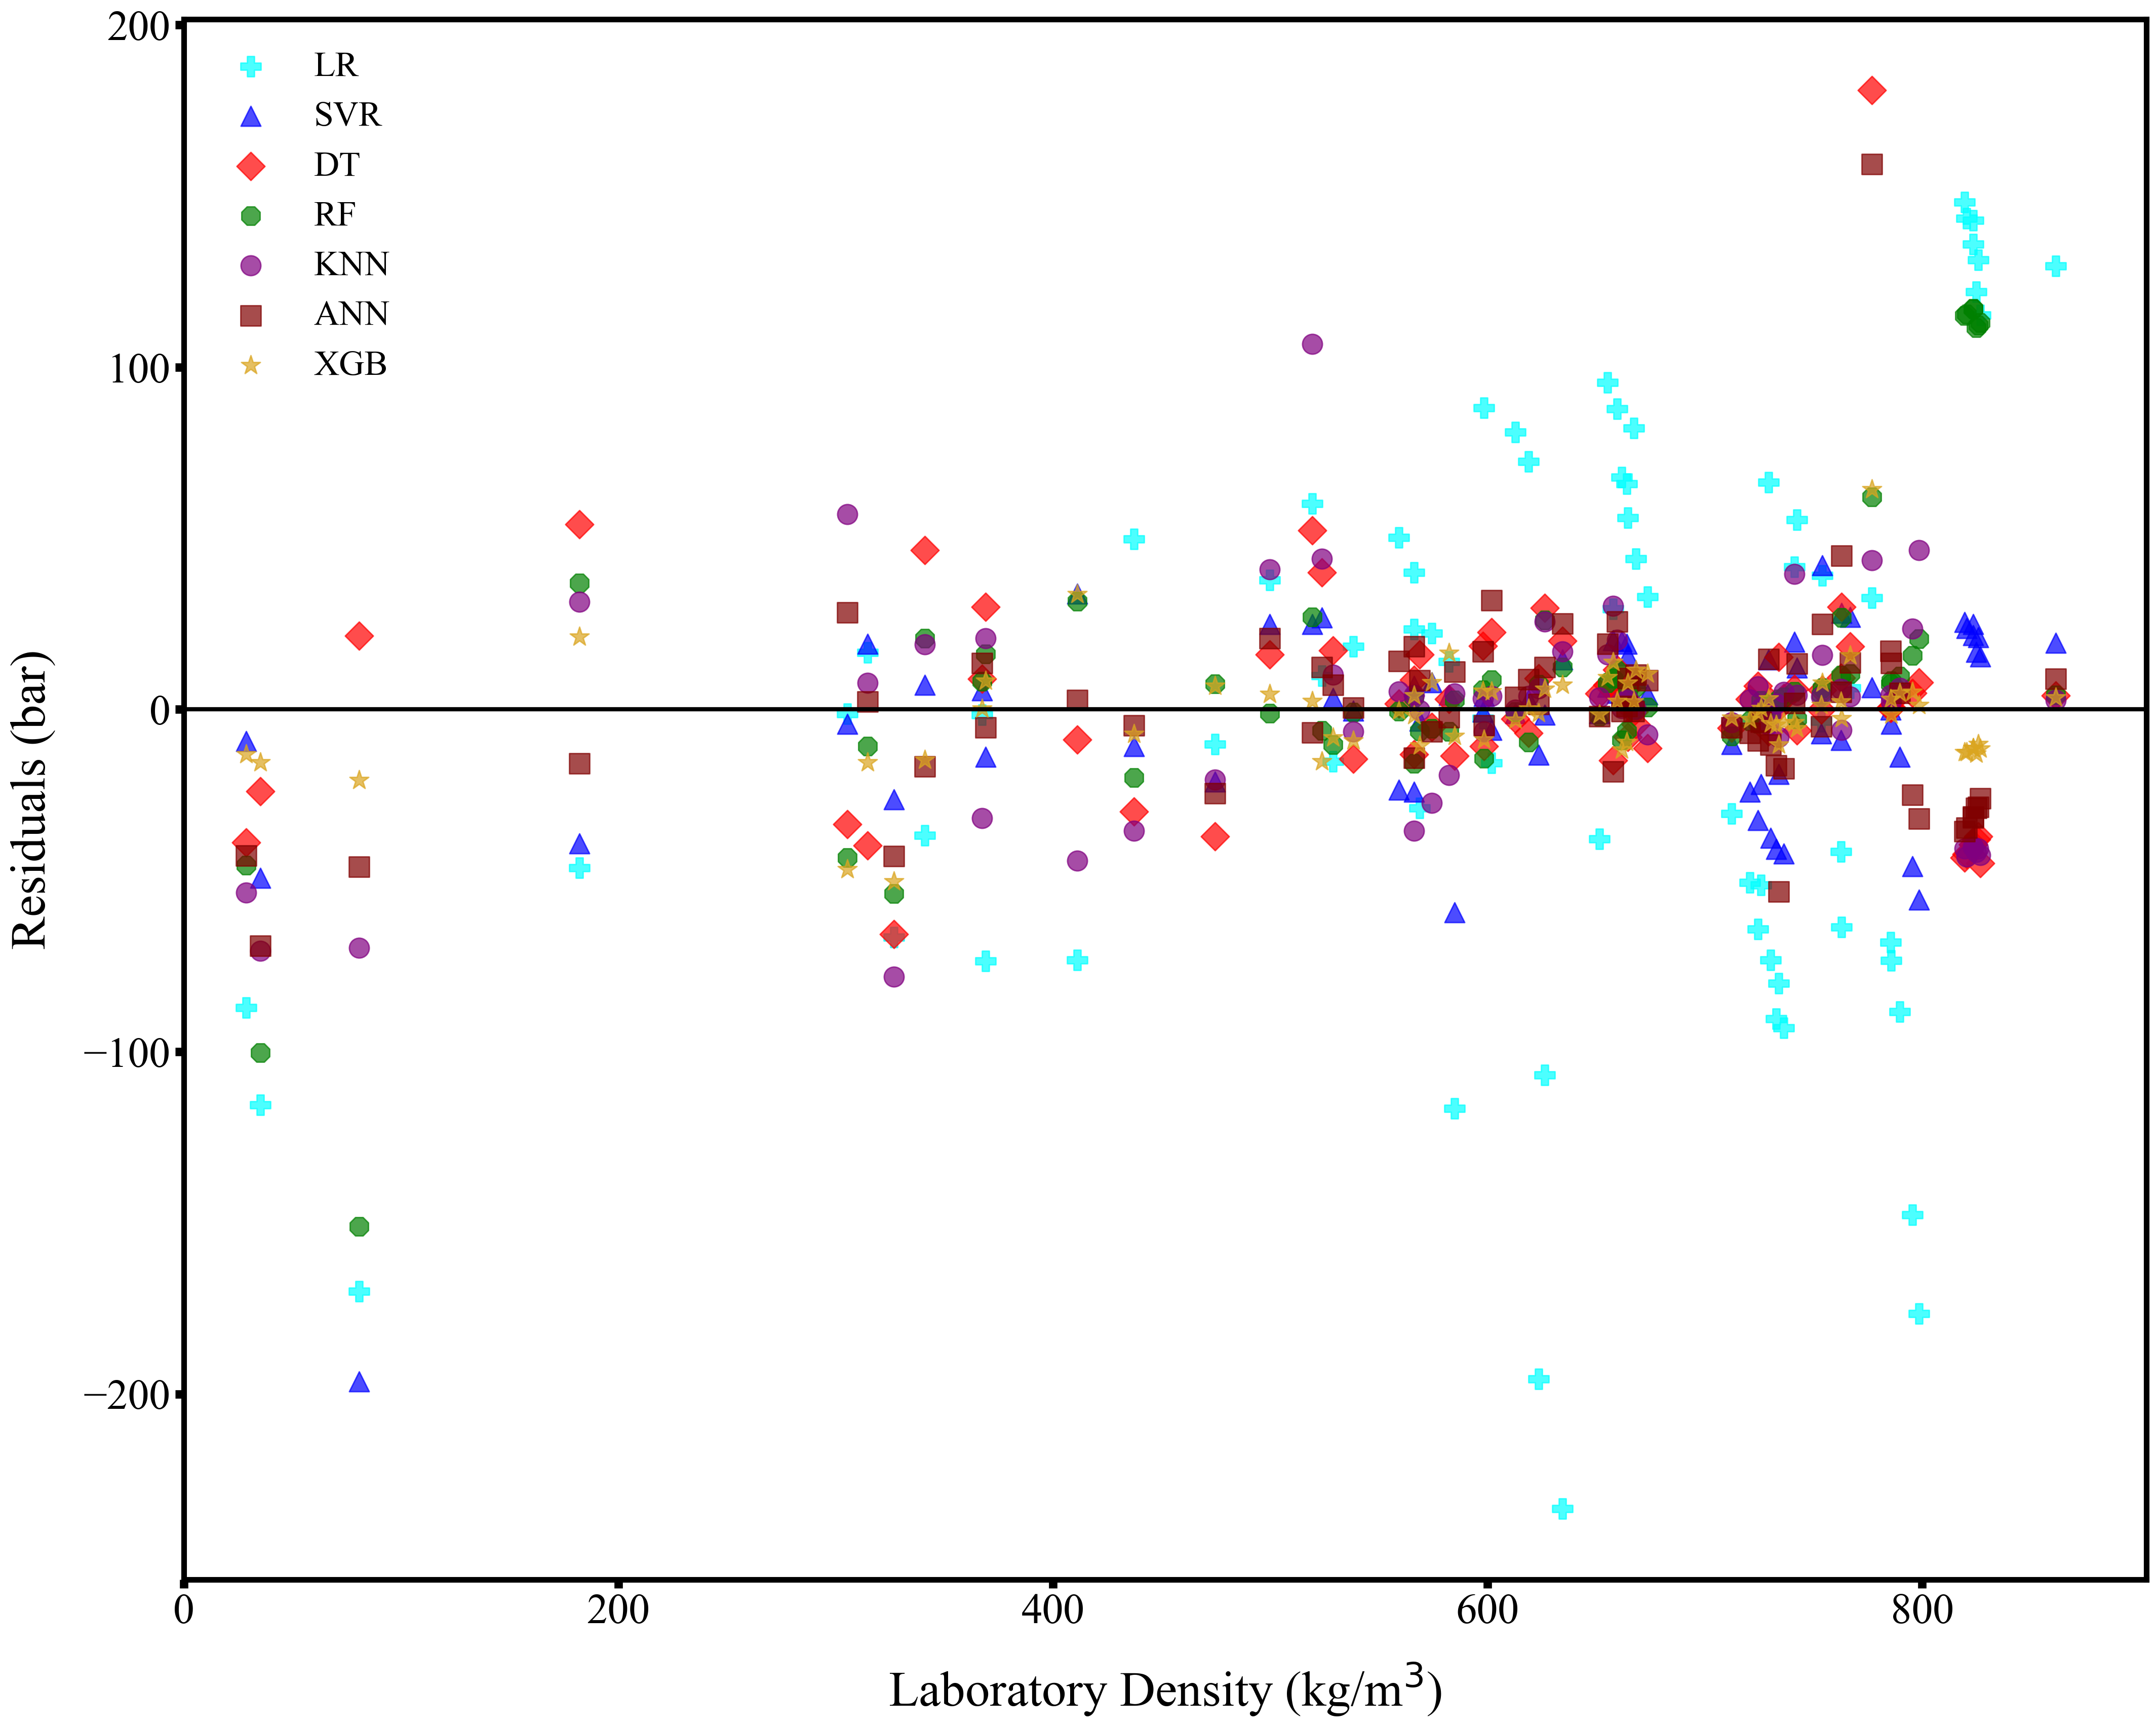

In [110]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_compare_res = plt.figure(figsize = (25,20) , dpi = 200)
plt.scatter(lr_plot_result["Density (test)"] ,lr_plot_result["Residual"] , marker = "P" , s = 200 , c = "Cyan",label = "LR",alpha = 0.7)
plt.scatter(svr_plot_result["Density (test)"] ,svr_plot_result["Residual"] , marker = "^" , s = 200 , c = "blue",label = "SVR",alpha = 0.7)
plt.scatter(dt_plot_result["Density (test)"] ,dt_plot_result["Residual"] , marker = "D" , s = 200 , c = "red",label = "DT",alpha = 0.7)
plt.scatter(rf_plot_result["Density (test)"] ,rf_plot_result["Residual"] , marker = "8" , s = 200 , c = "green",label = "RF",alpha = 0.7)
plt.scatter(knn_plot_result["Density (test)"] ,knn_plot_result["Residual"] , marker = "o" , s = 200 , c = "purple",label = "KNN",alpha = 0.7)
plt.scatter(ann_plot_result["Density (test)"] ,ann_plot_result["Residual"] , marker = "s" , s = 200 , c = "maroon",label = "ANN",alpha = 0.7)
plt.scatter(xgb_plot_result["Density (test)"] ,xgb_plot_result["Residual"] , marker = "*" , s = 200 , c = "goldenrod",label = "XGB",alpha = 0.7)


plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 35, labelpad = 20)
plt.ylabel("Residuals (bar)",fontsize = 35, labelpad = 20)
plt.xlim((0,None))

#Defining axis of graph and increasing width of boarder of box
ax = fig_compare_res.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
    
plt.axhline(y = 0, color = 'black',ls = "-" ,lw = 3)


fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-115-8598cca45360>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_linear2.savefig(figure_path + "linear_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-115-8598cca45360>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_linear2.savefig(figure_path + "linear_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


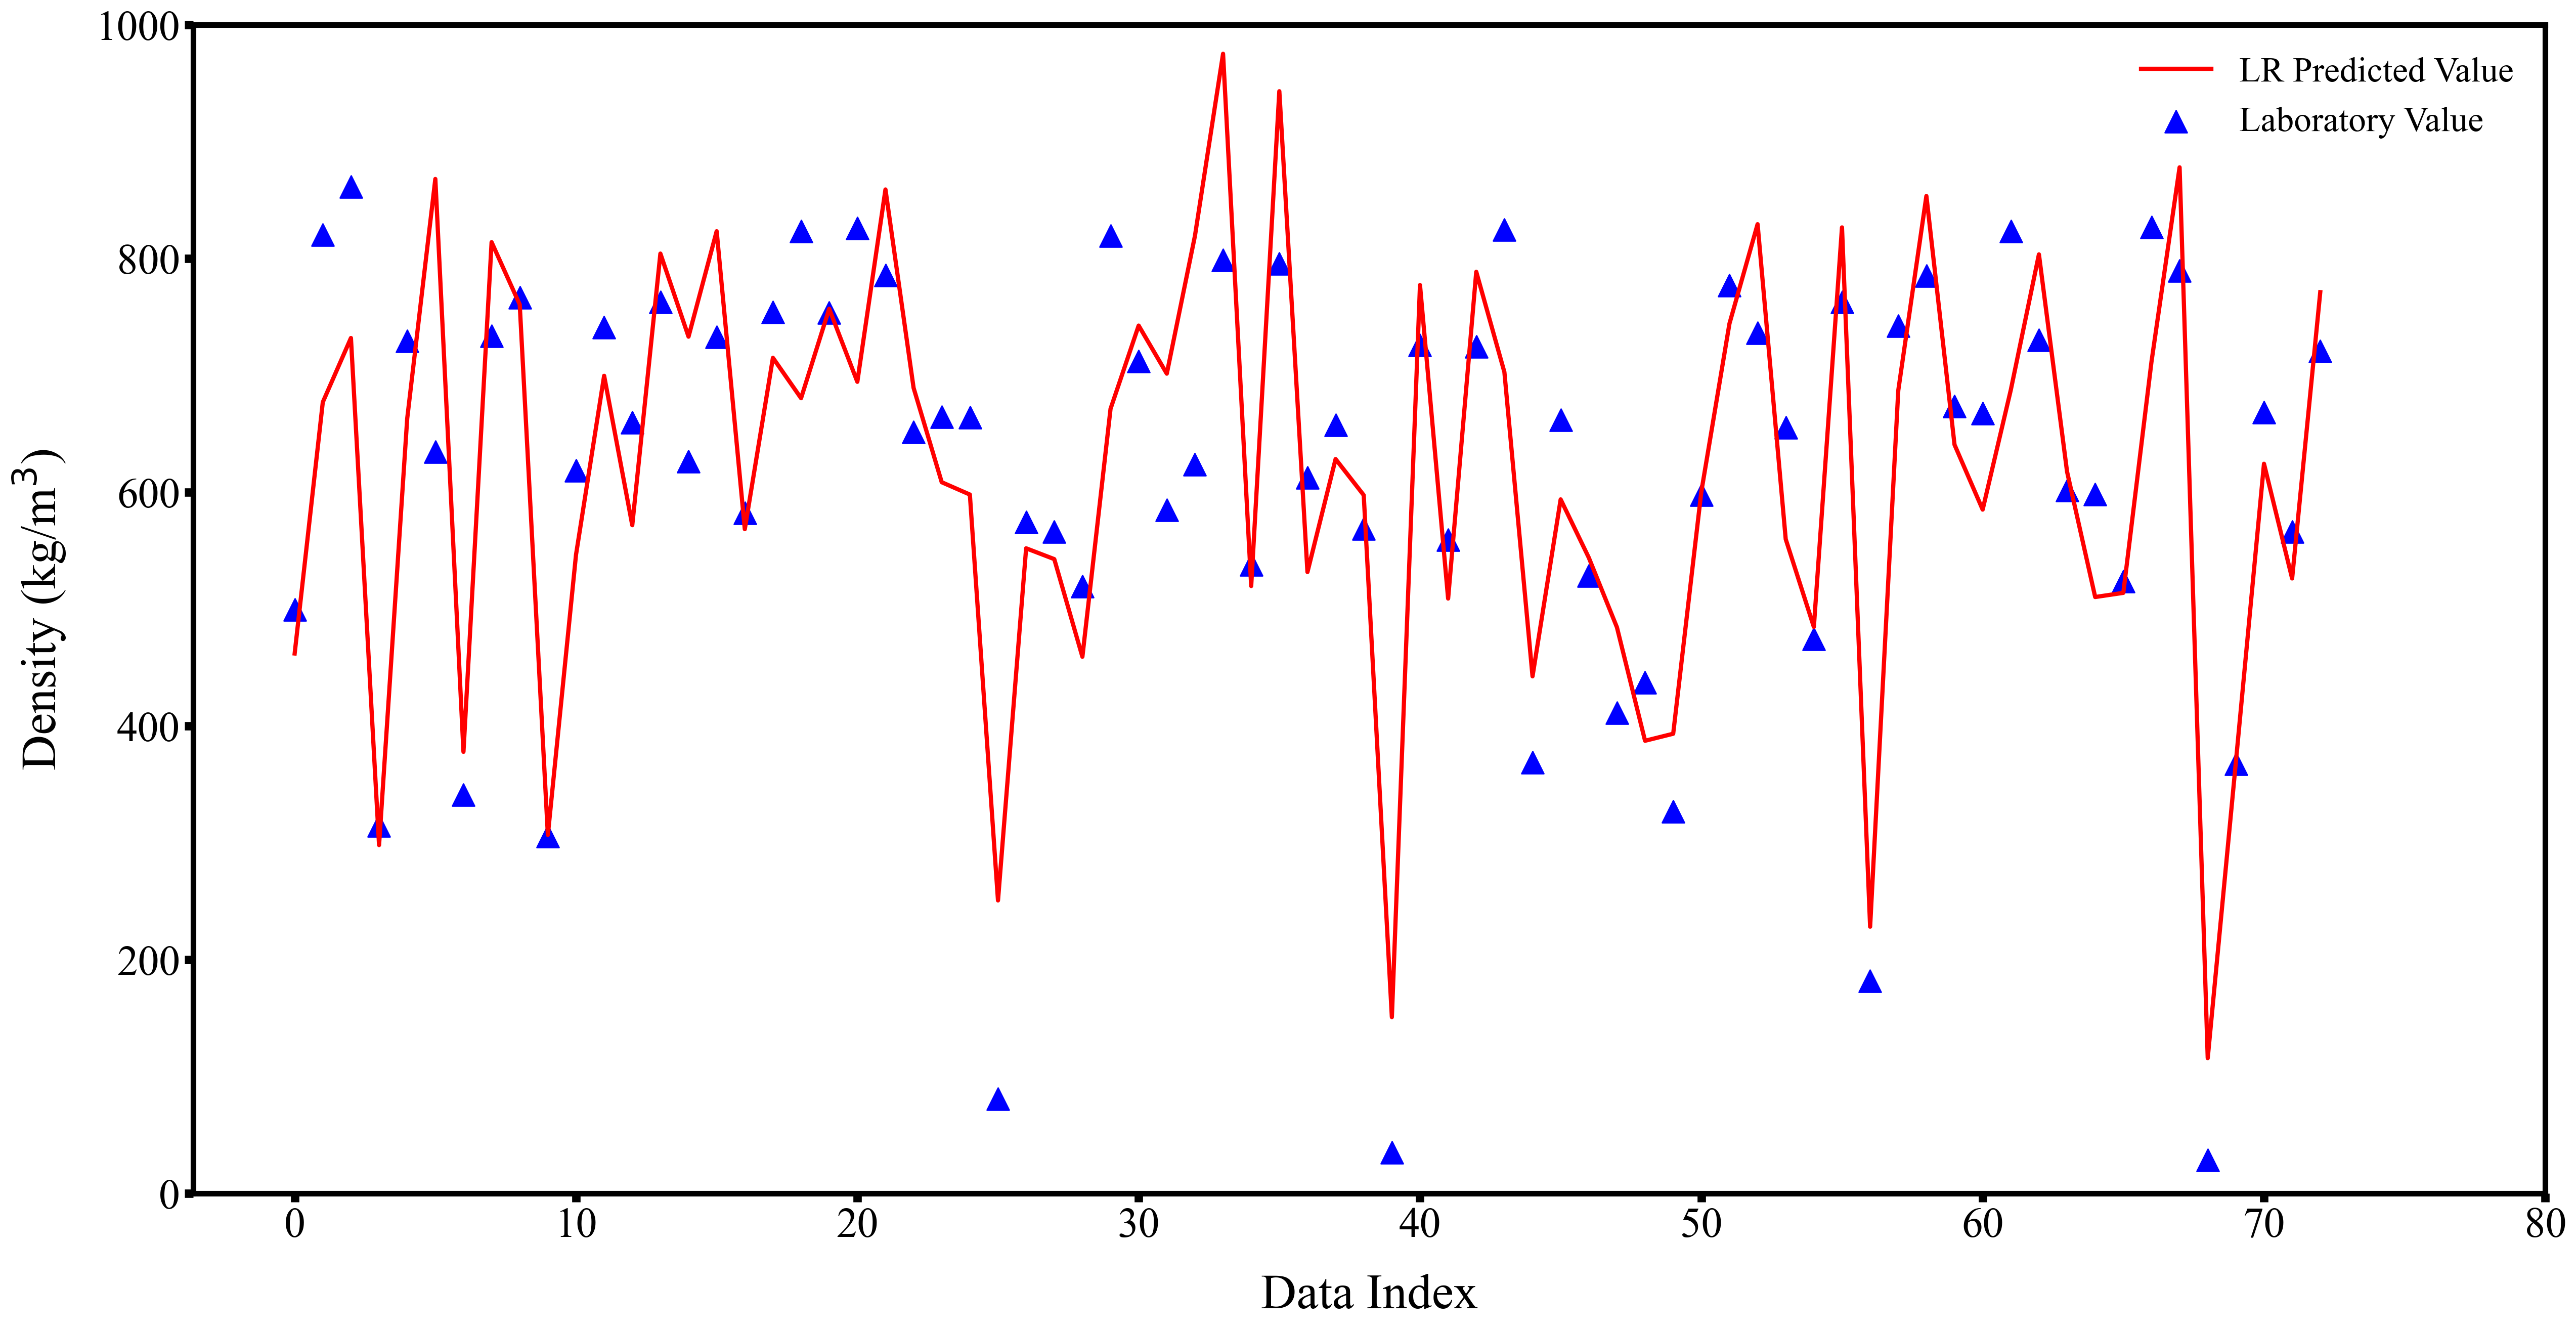

In [115]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_linear2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(lr_plot_result.index ,lr_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(svr_plot_result.index ,svr_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(lr_plot_result.index ,lr_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "LR Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)

#Defining axis of graph and increasing width of boarder of box
ax = fig_linear2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_linear2.savefig(figure_path + "linear_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-122-2971a0e488b8>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-122-2971a0e488b8>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


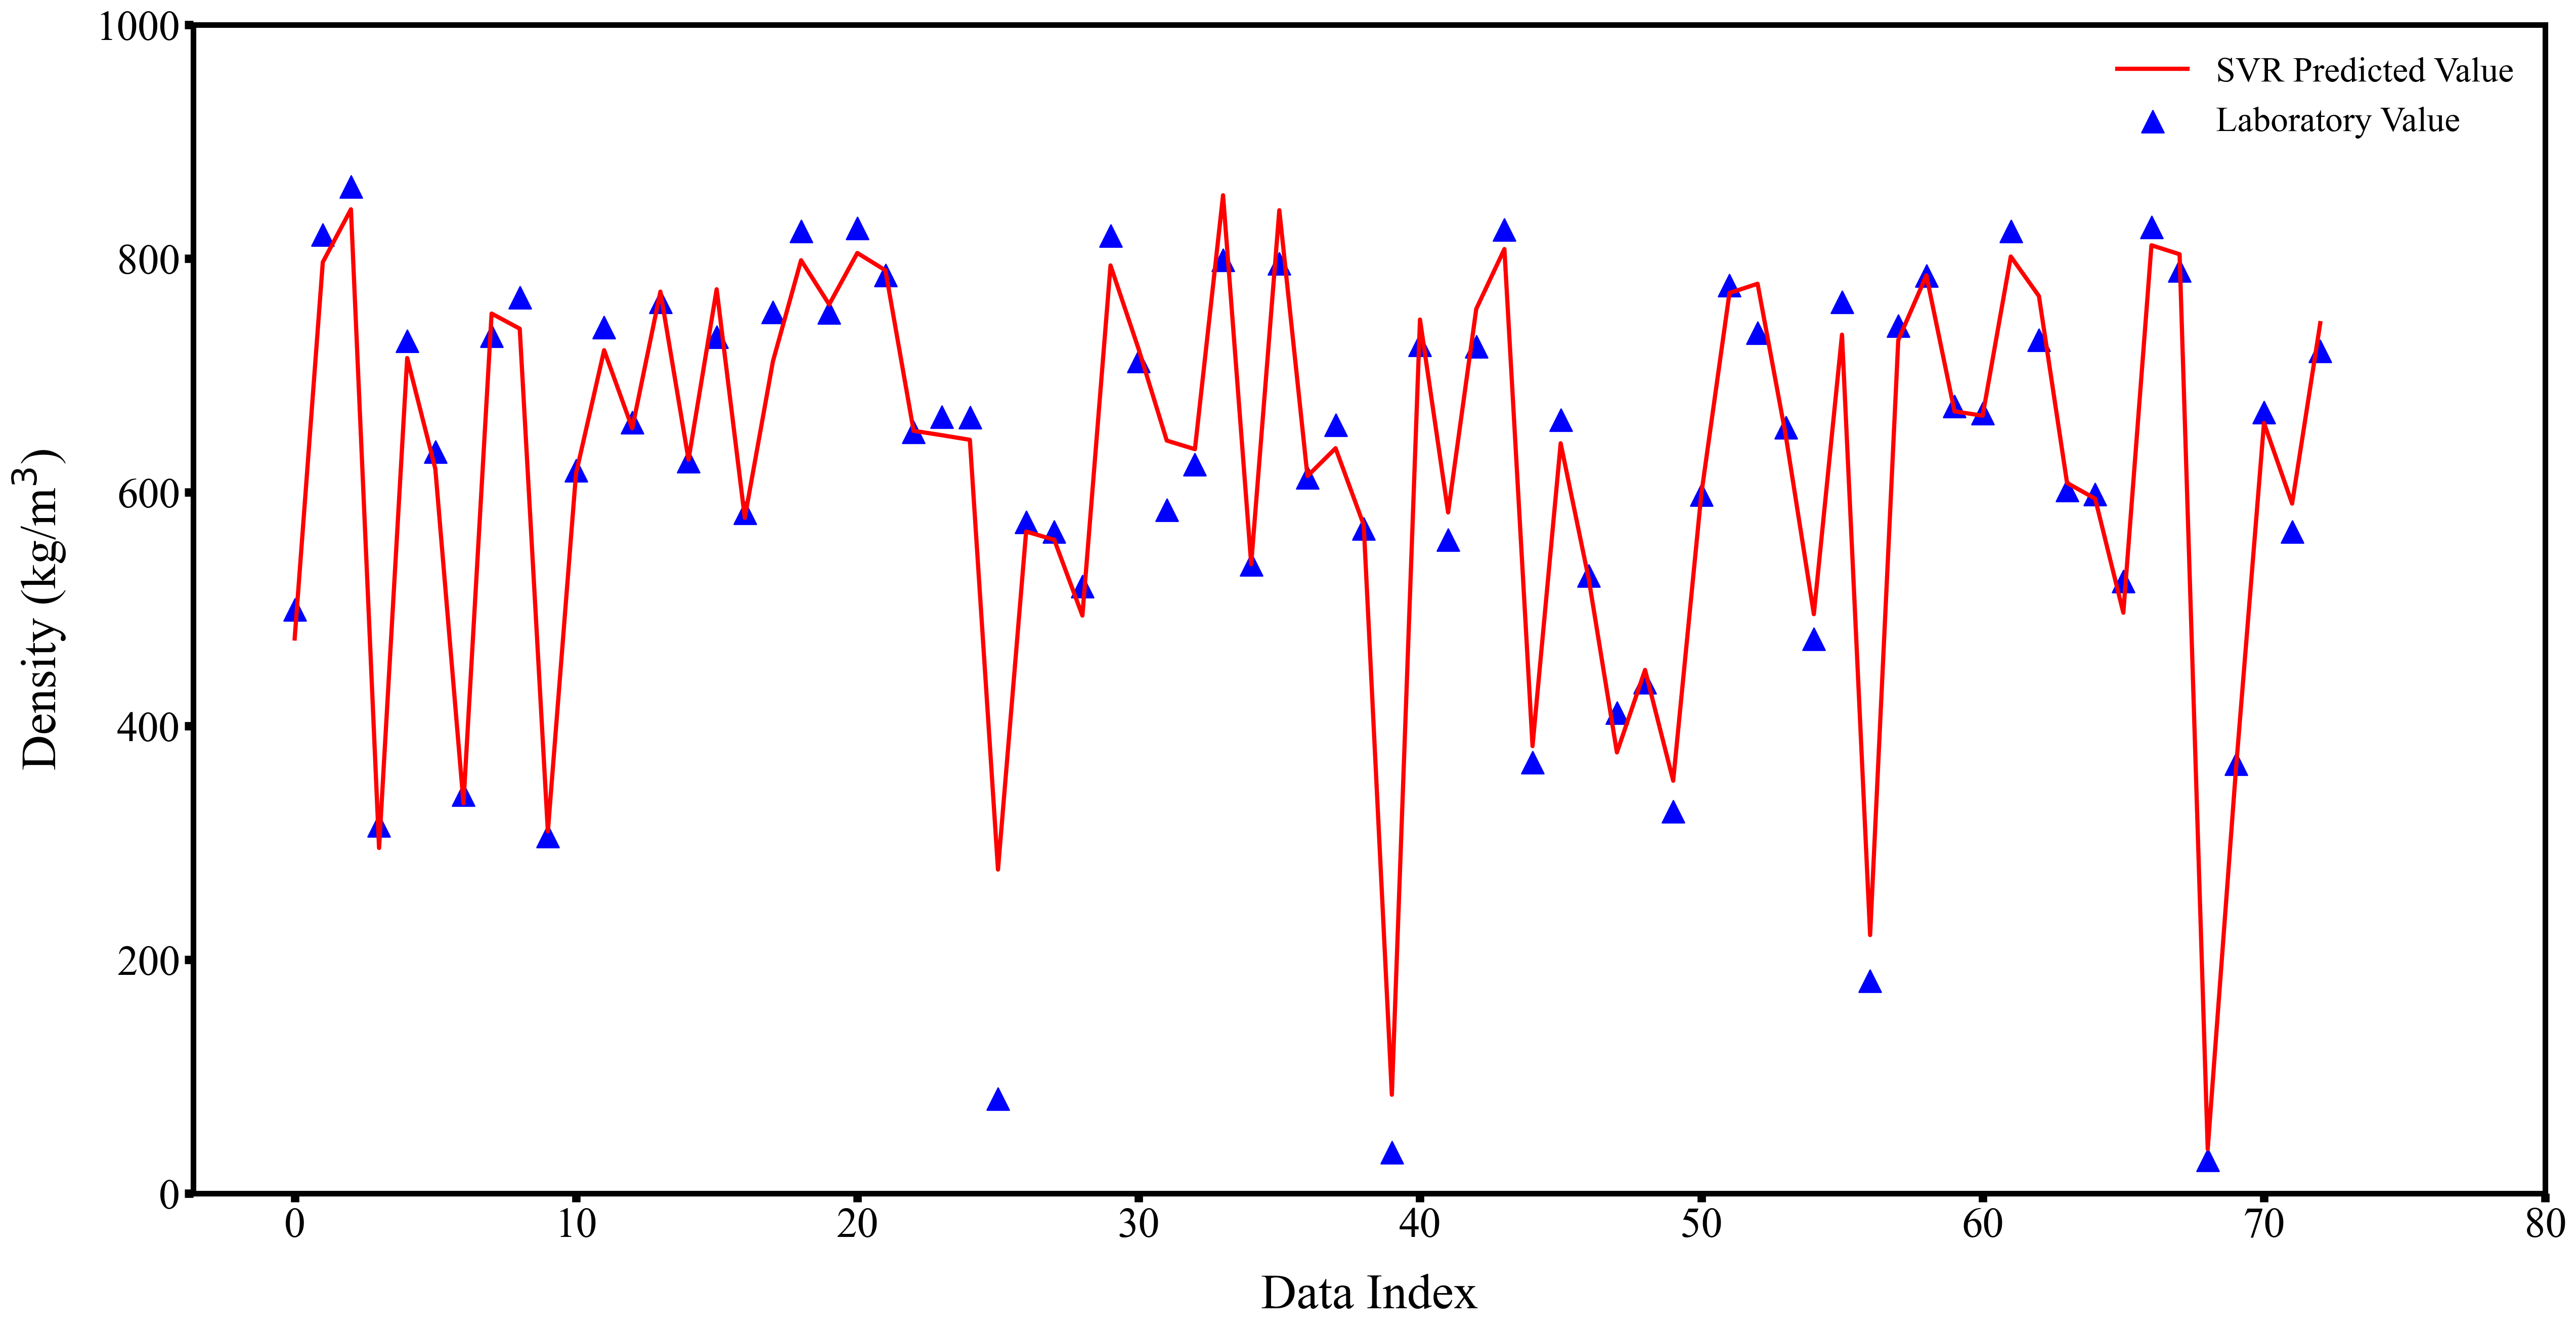

In [122]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_svr2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(svr_plot_result.index ,svr_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(svr_plot_result.index ,svr_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(svr_plot_result.index ,svr_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "SVR Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)
#Defining axis of graph and increasing width of boarder of box
ax = fig_svr2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-123-68ed8a570883>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-123-68ed8a570883>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


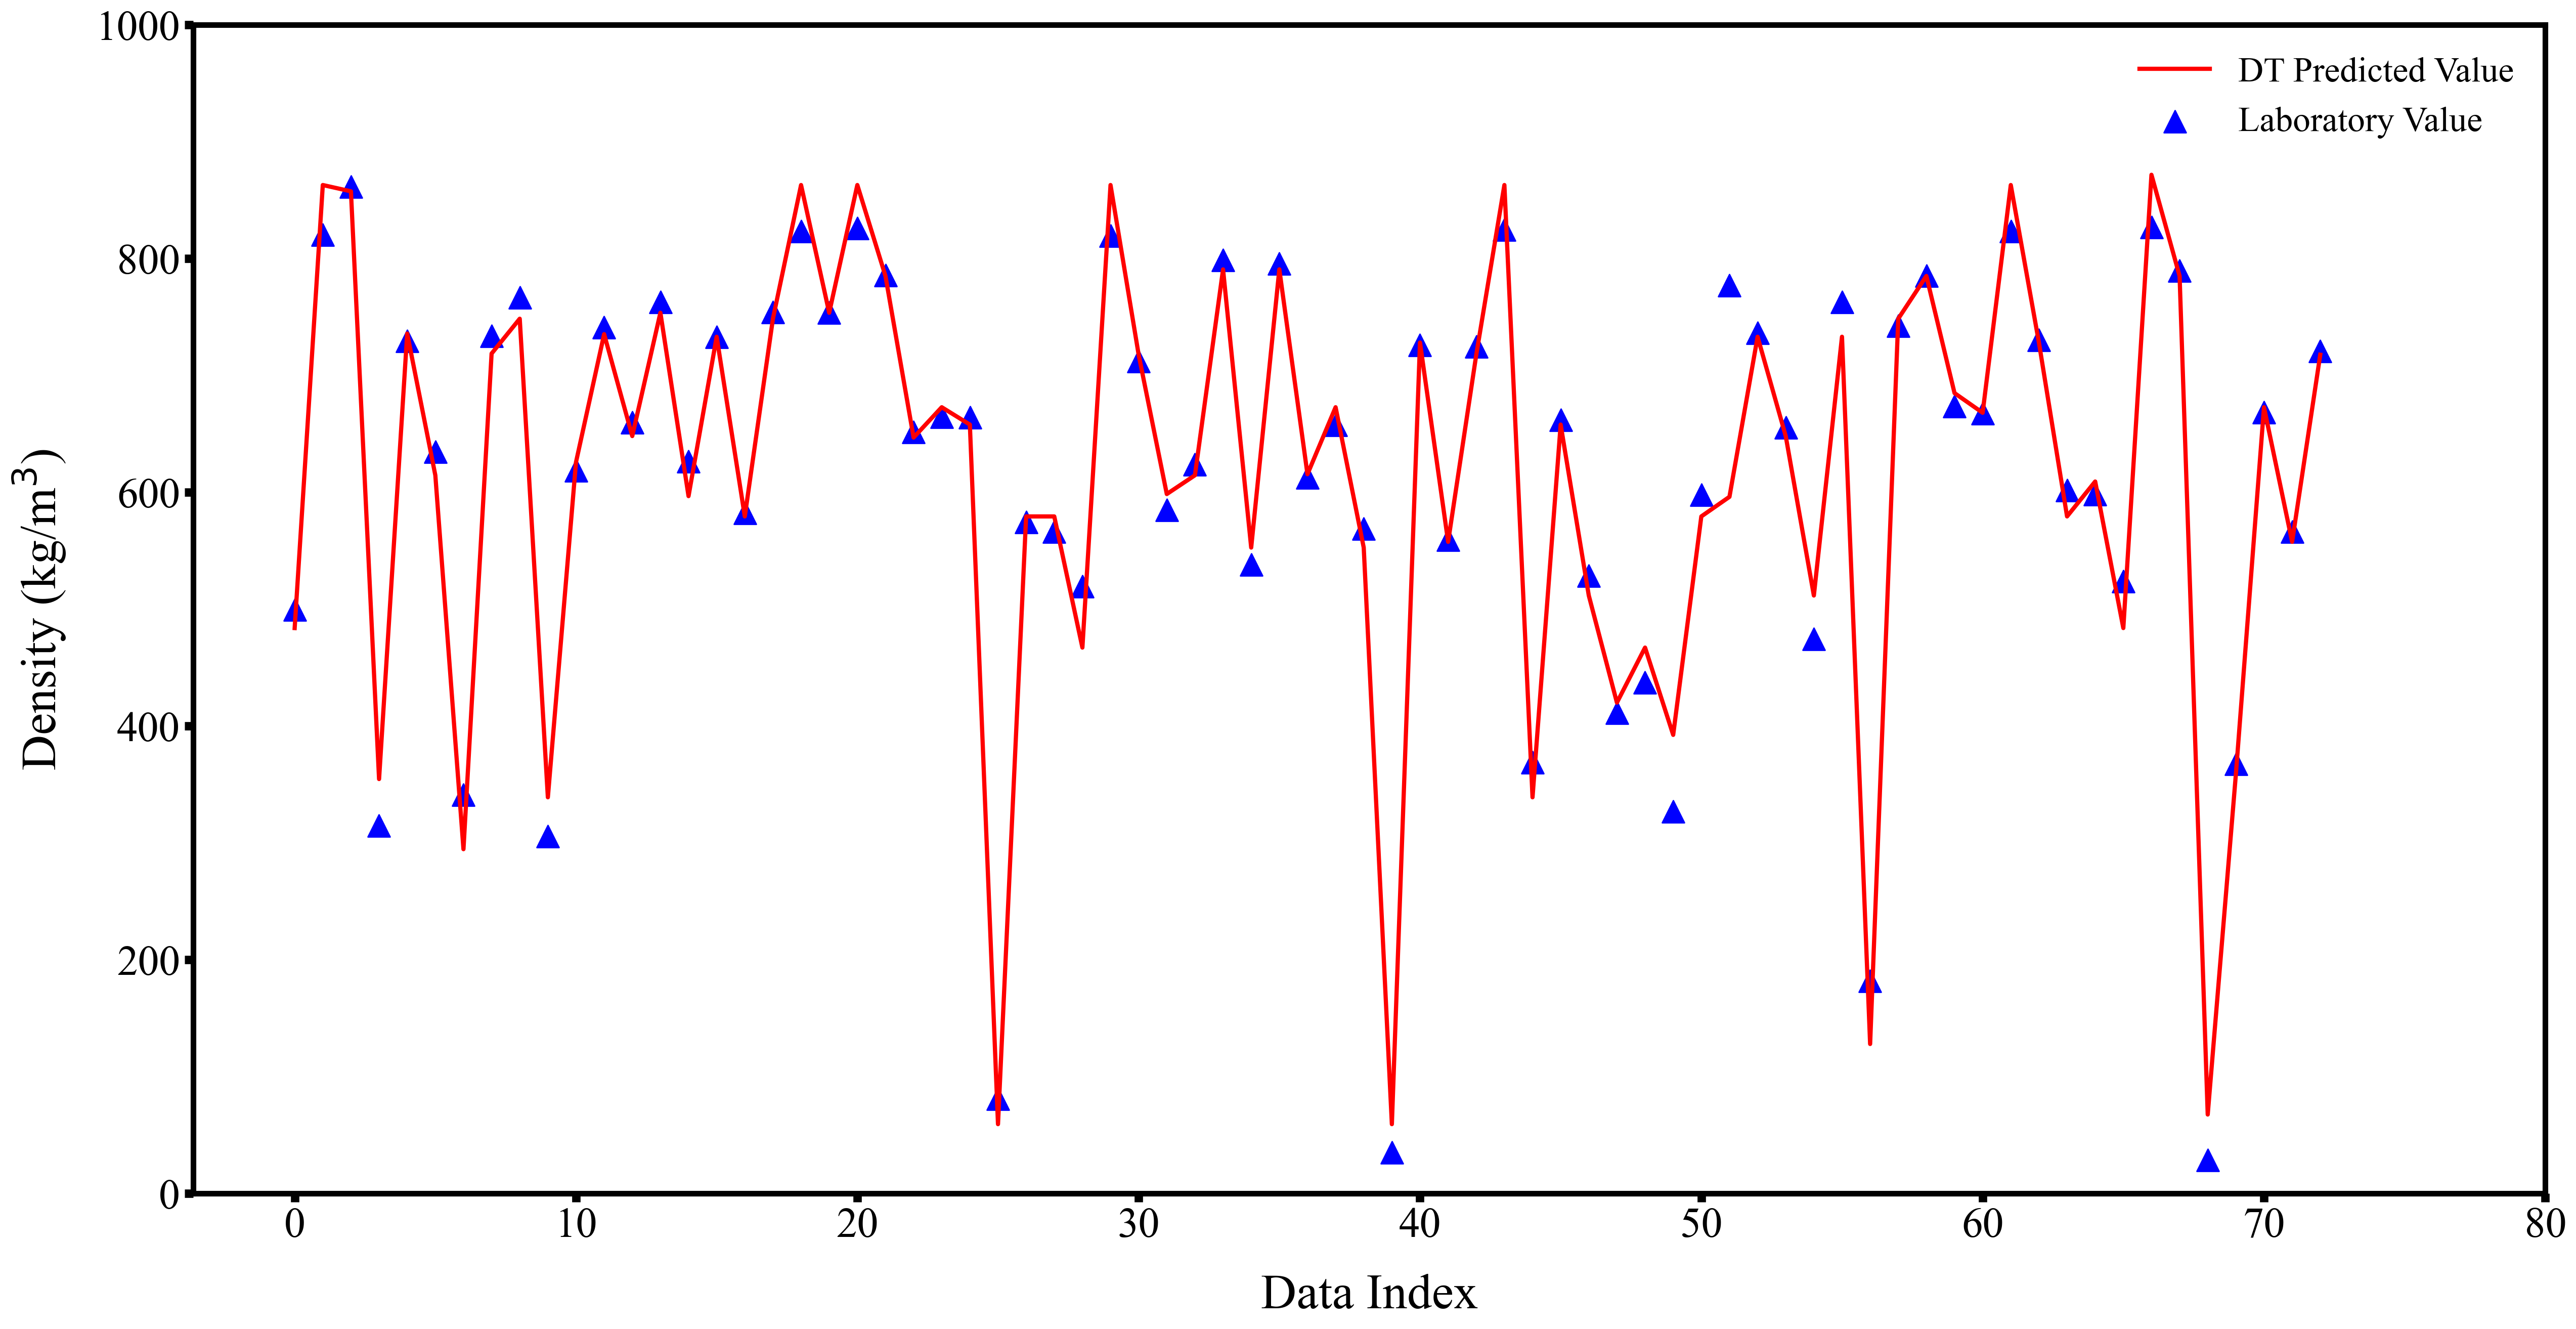

In [123]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_dt2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(dt_plot_result.index ,dt_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(dt_plot_result.index ,dt_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(dt_plot_result.index ,dt_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "DT Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)
#Defining axis of graph and increasing width of boarder of box
ax = fig_dt2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-124-cb1126164135>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-124-cb1126164135>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


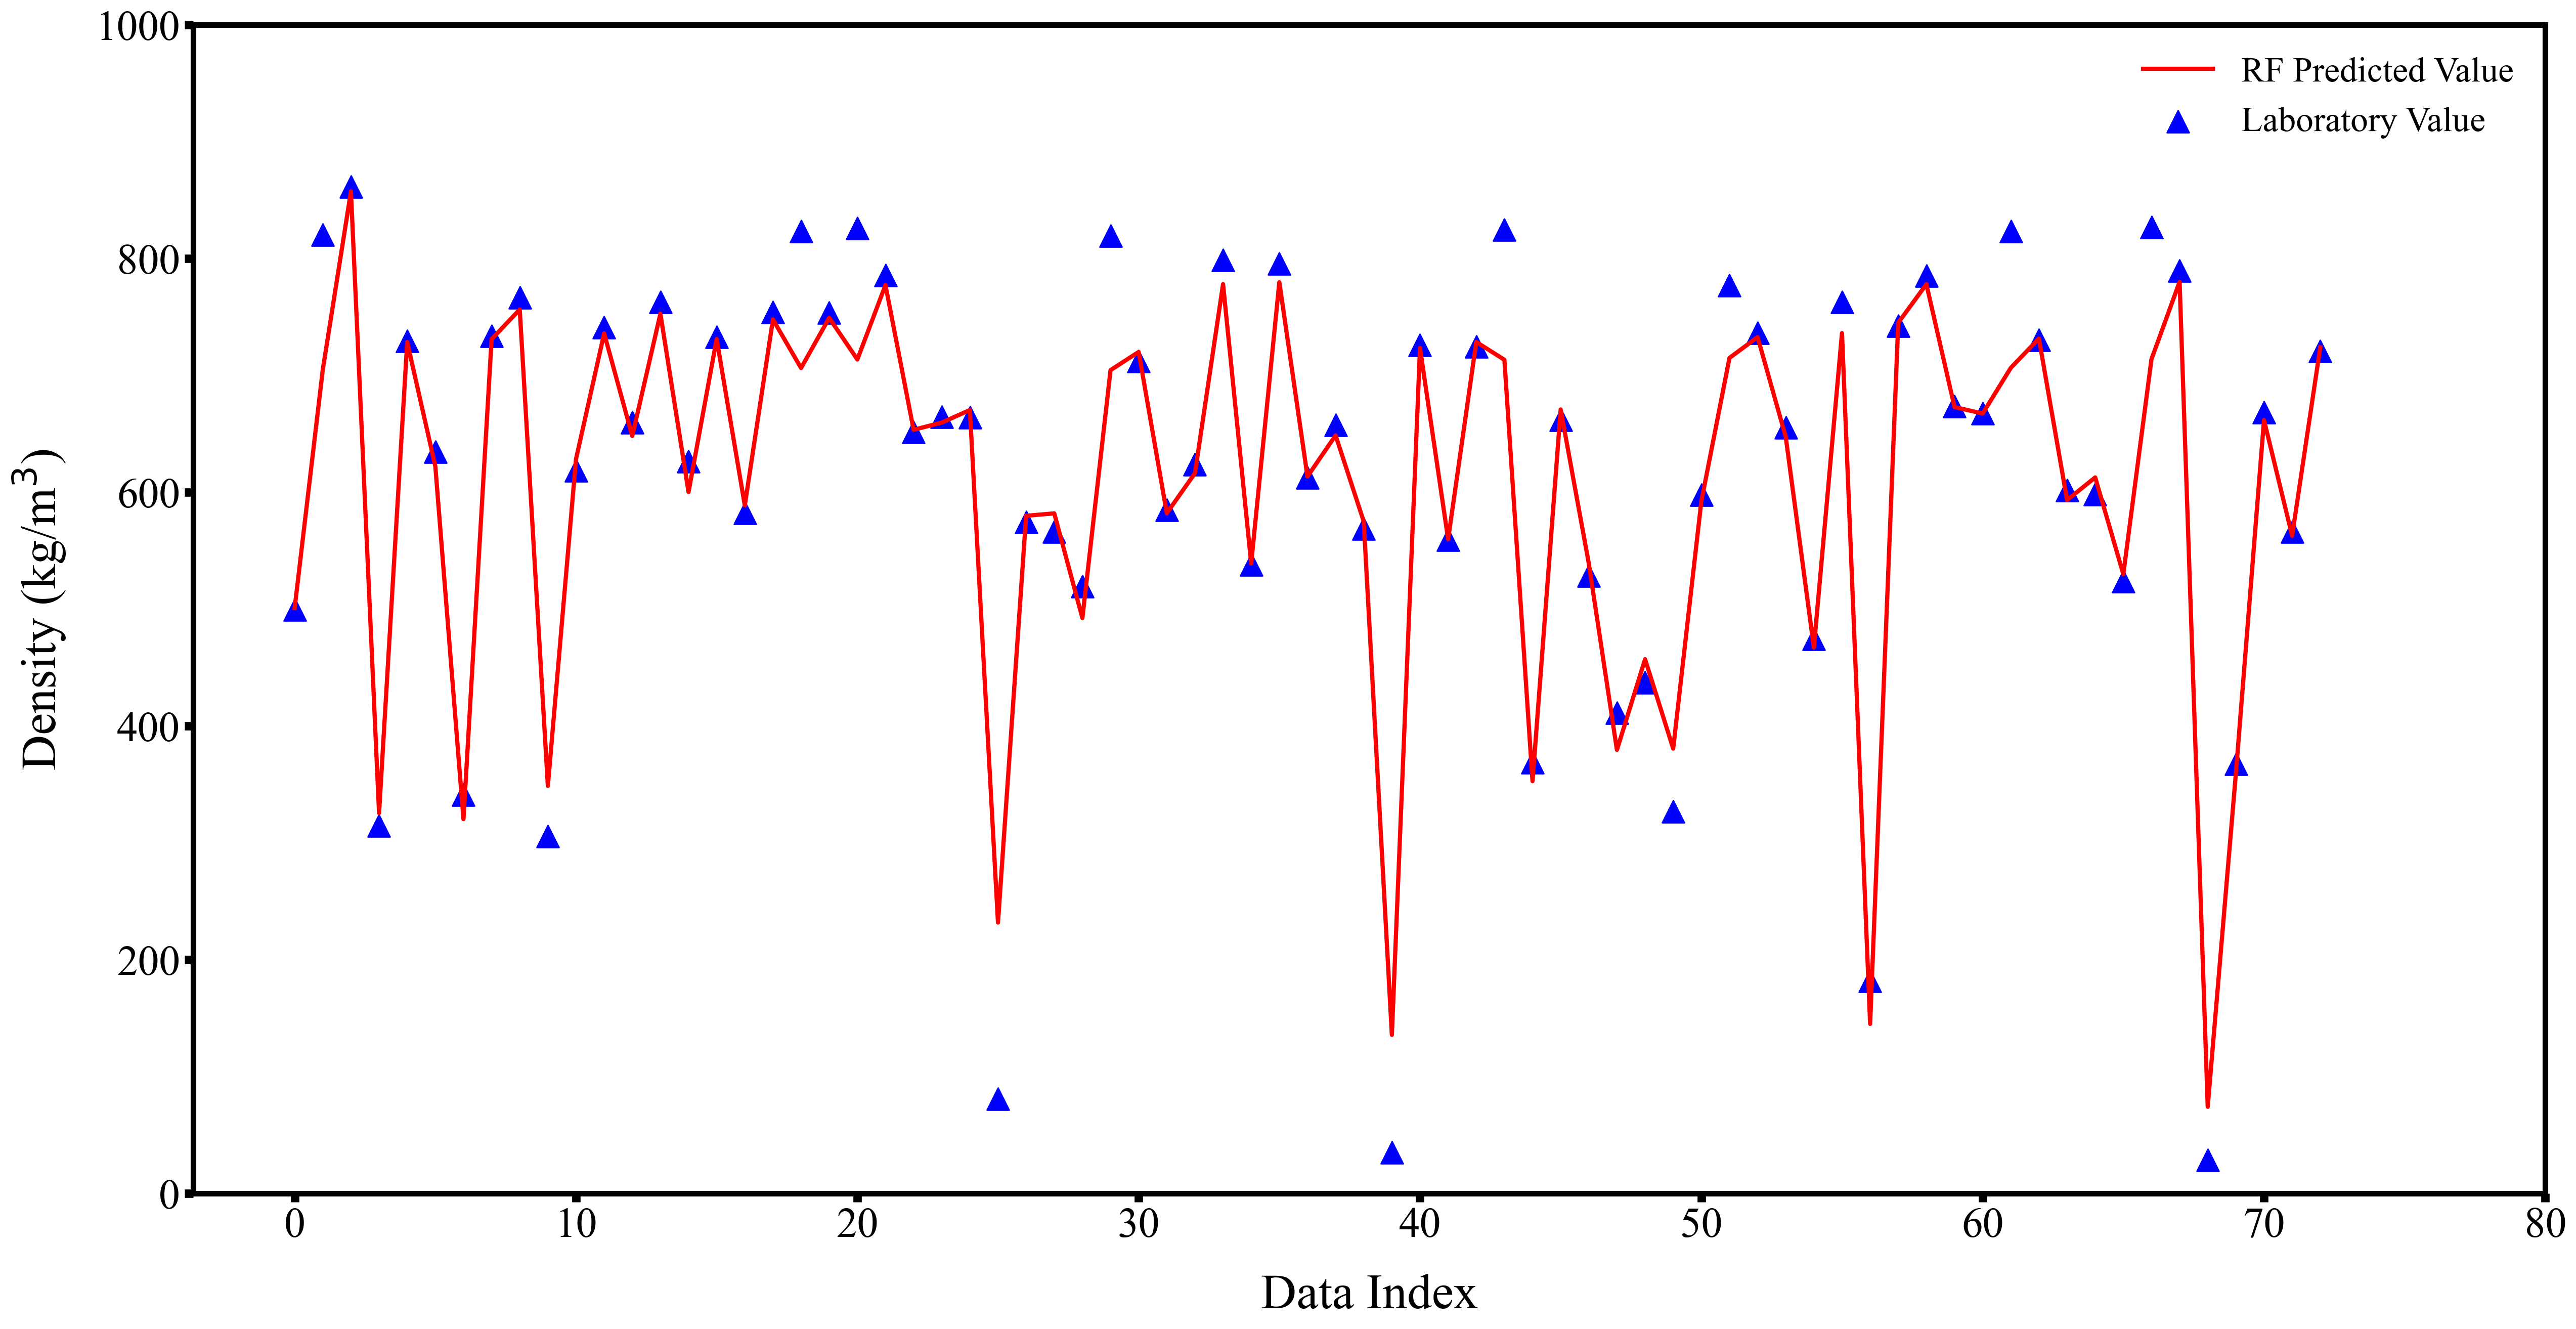

In [124]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_rf2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(rf_plot_result.index ,rf_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(rf_plot_result.index ,rf_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(rf_plot_result.index ,rf_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "RF Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)
#Defining axis of graph and increasing width of boarder of box
ax = fig_rf2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-125-f42ebfb2d2b2>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-125-f42ebfb2d2b2>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


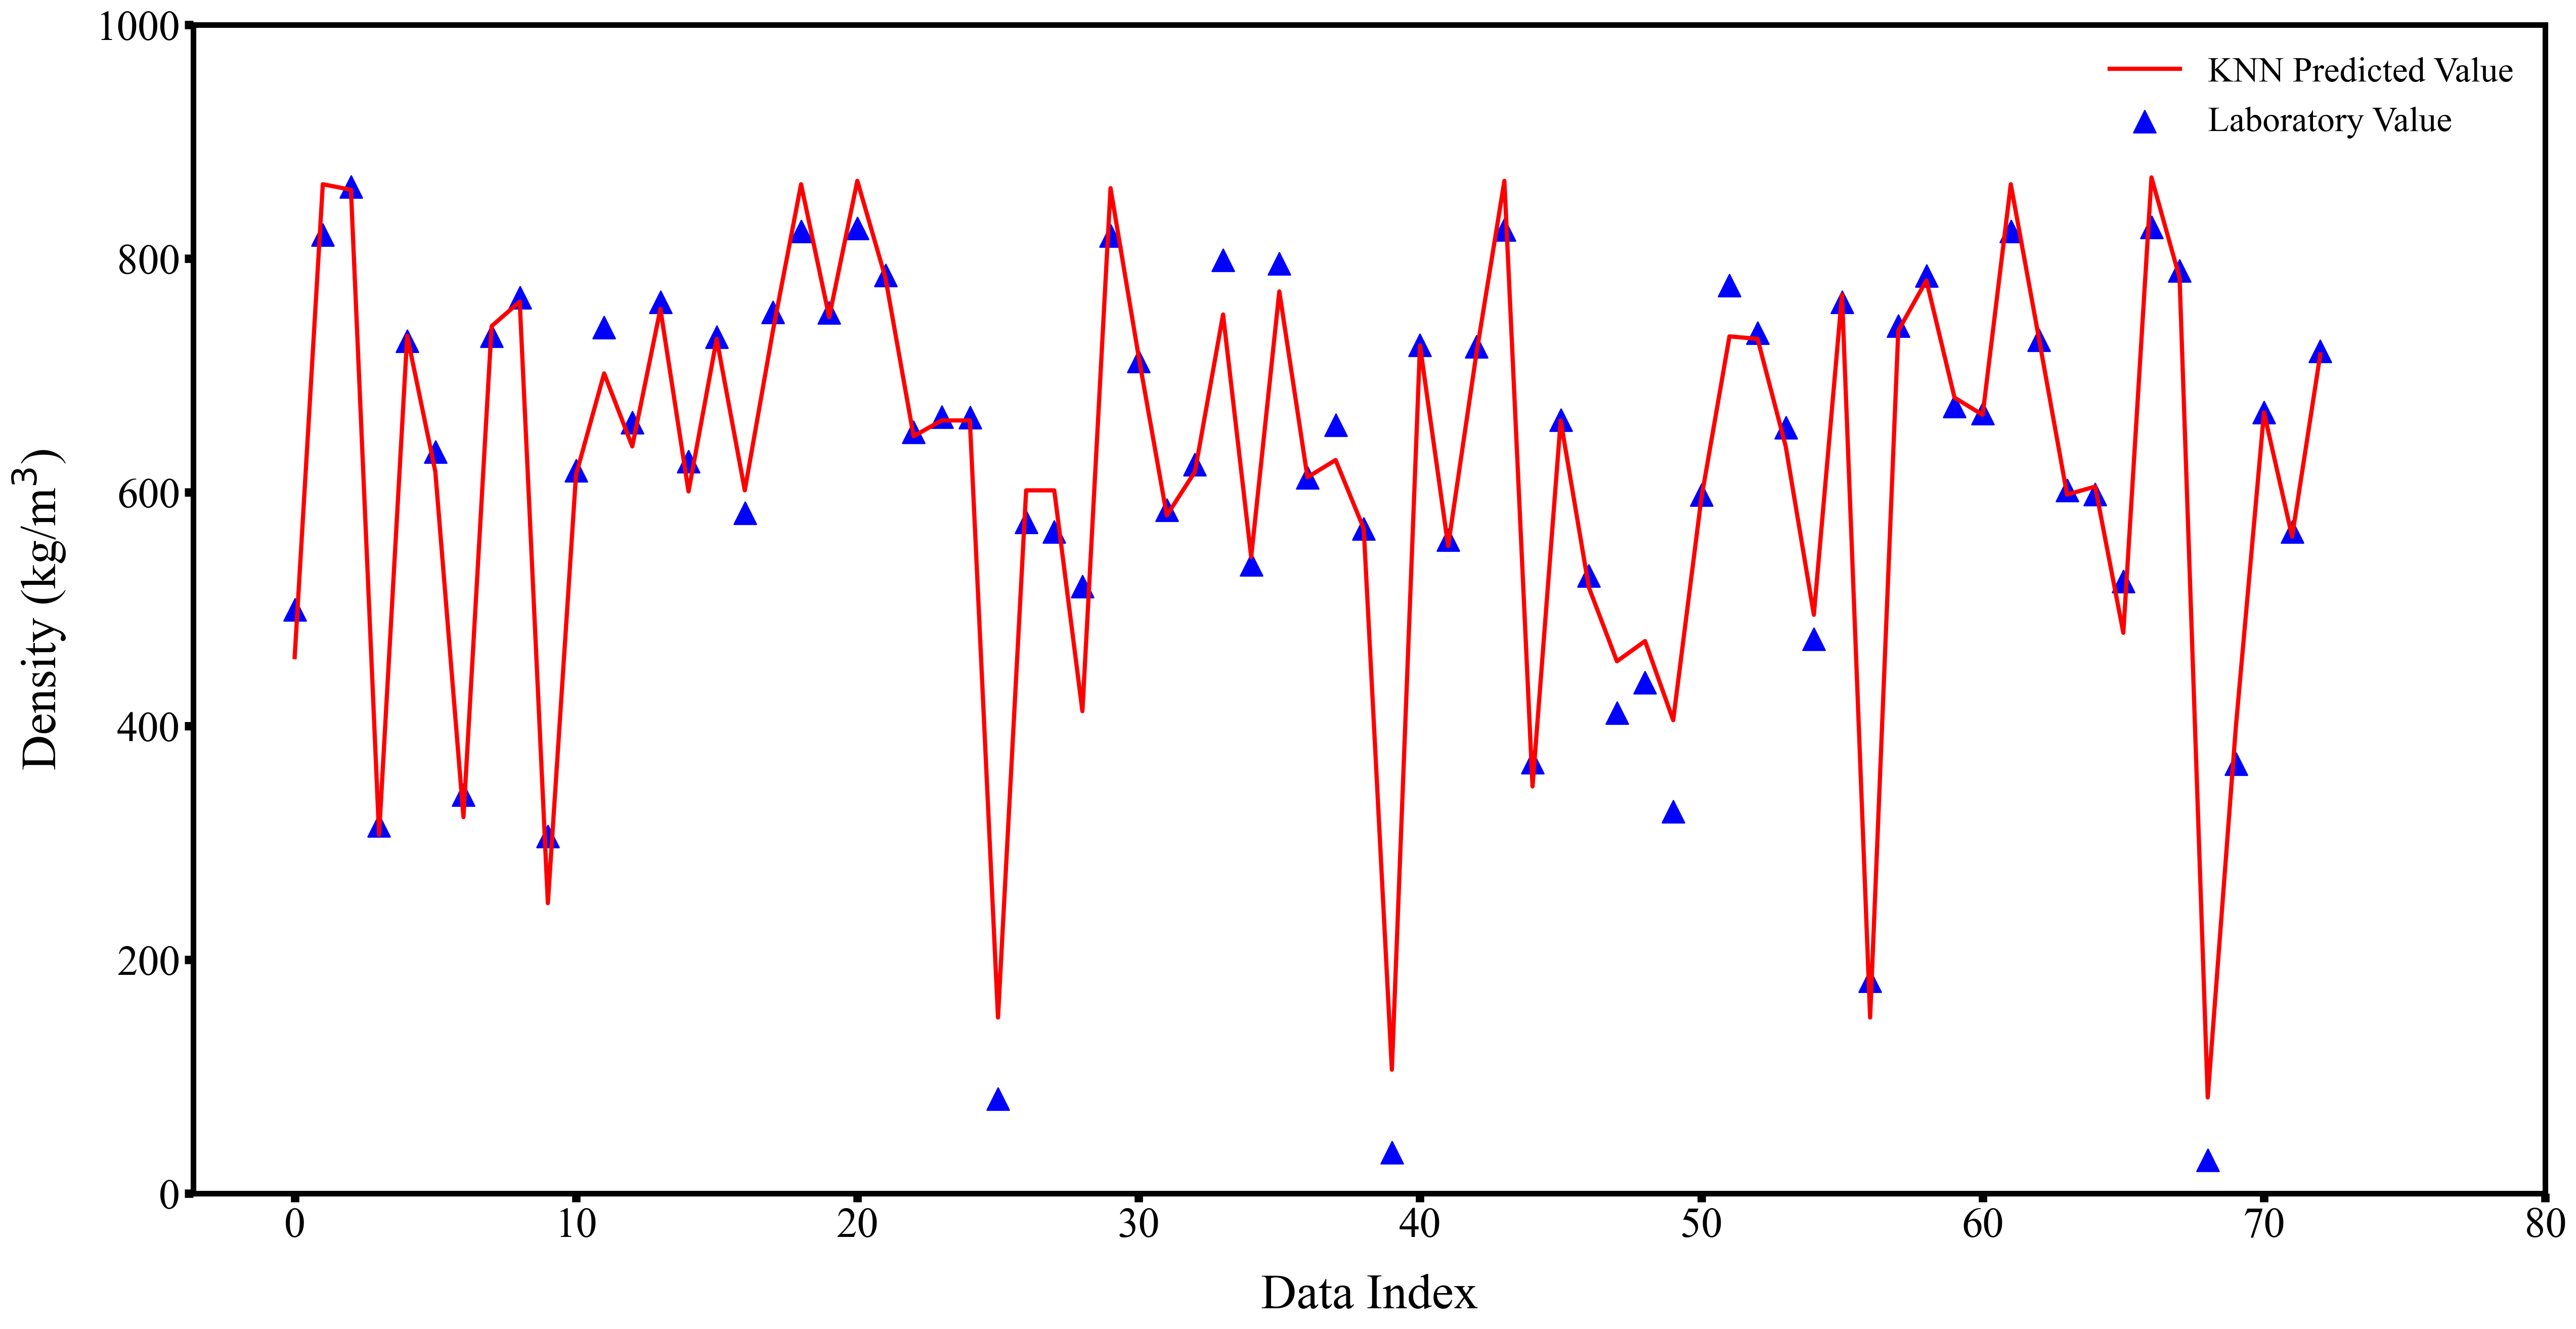

In [125]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_knn2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(knn_plot_result.index ,knn_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(knn_plot_result.index ,knn_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(knn_plot_result.index ,knn_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "KNN Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)

#Defining axis of graph and increasing width of boarder of box
ax = fig_knn2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


<ipython-input-126-f33511feaa18>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-126-f33511feaa18>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


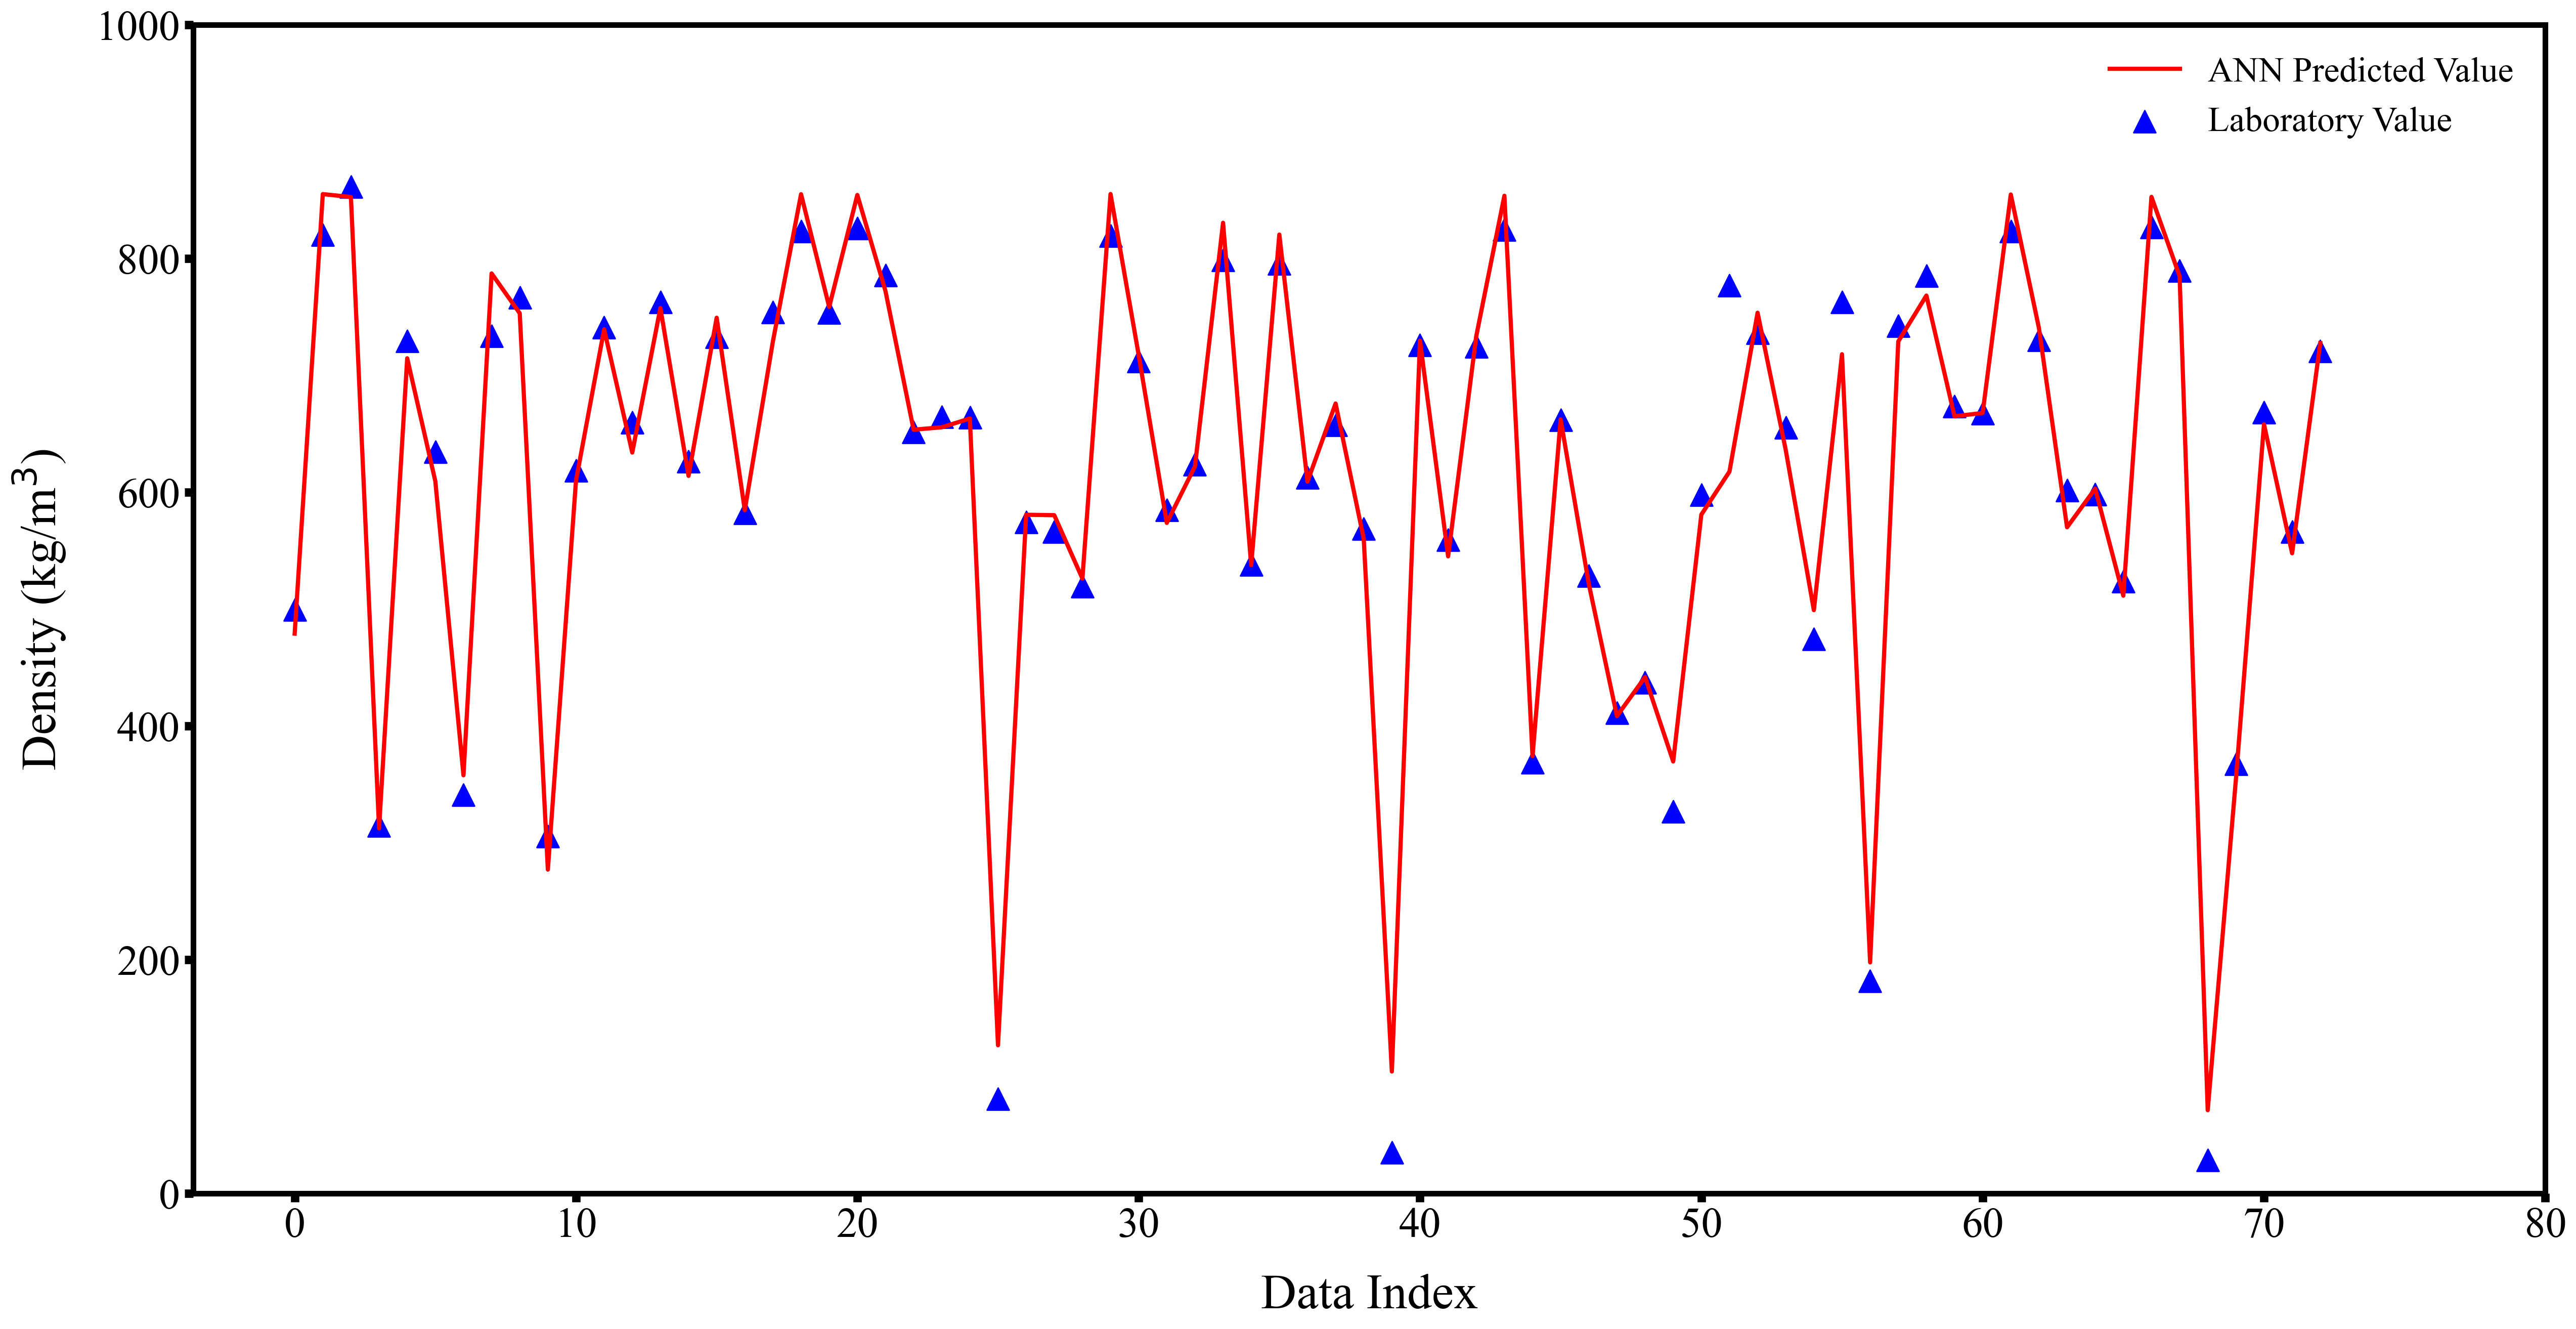

In [126]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_ann2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(ann_plot_result.index ,ann_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(ann_plot_result.index ,ann_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(ann_plot_result.index ,ann_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "ANN Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)

#Defining axis of graph and increasing width of boarder of box
ax = fig_ann2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


<ipython-input-127-596072ec474a>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-127-596072ec474a>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


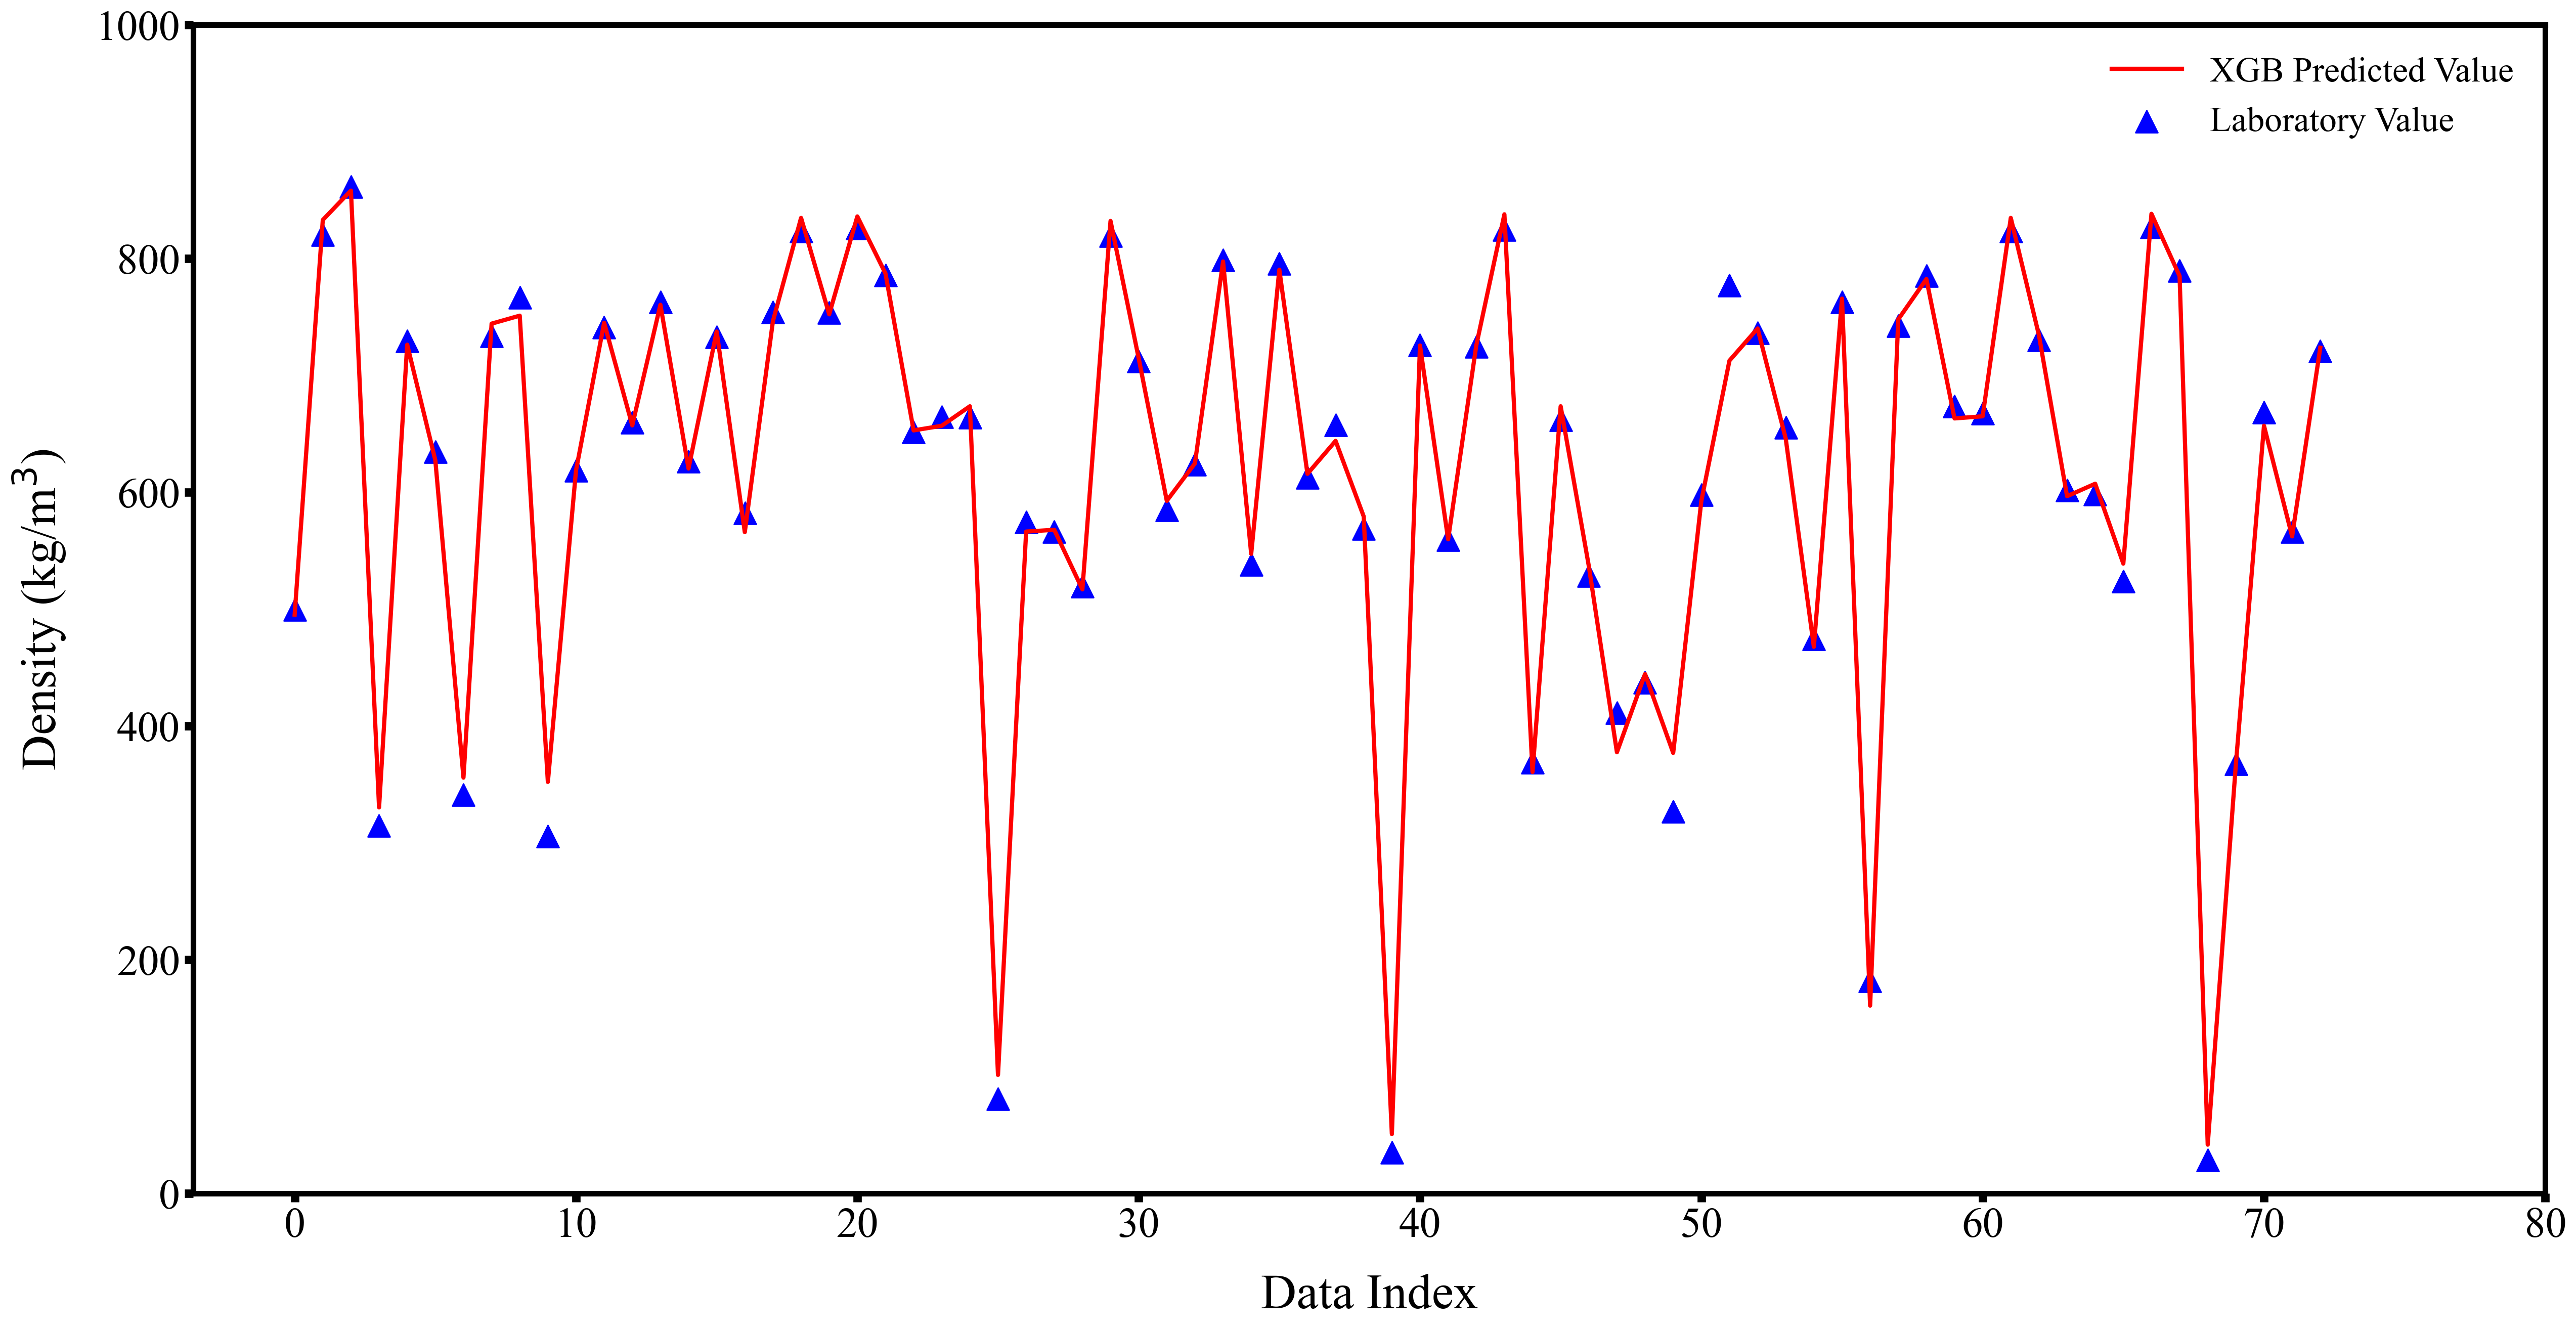

In [127]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_xgb2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(xgb_plot_result.index ,xgb_plot_result[["Density (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(xgb_plot_result.index ,xgb_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(xgb_plot_result.index ,xgb_plot_result[["Predicted Density (test)"]] ,lw = 3 , c = "red",label = "XGB Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Density (kg/m$^{3}$)",fontsize = 35, labelpad = 20)
plt.xlim(None,80)
plt.ylim(0,1000)

#Defining axis of graph and increasing width of boarder of box
ax = fig_xgb2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

